# Exercise 5  [No longer required for bachelor students]

In this exercise we are given the ground state wave function of an hydrogen atom:
$$\psi_{1,0,0}(r,\theta,\phi)=\frac{a_0^{-\frac{3}{2}}}{\sqrt\pi}e^{-\frac{r}{a_0}}$$
and the wave function of a 2p state :
$$\psi_{2,1,0}(r,\theta,\phi)=\frac{a_0^{-\frac{5}{2}}}{\sqrt{32\pi}}e^{-\frac{r}{2a_0}}r\cos(\theta)$$

We can calculate the probability density as the square modulus of the wave function (in units of the Bohr radius $a_0$ and in Cartesian coordinates):
$$|\psi_{1,0,0}(x,y,z)|^2=\frac{e^{-2\sqrt{x^2+y^2+z^2}}}{\pi}$$

$$|\psi_{2,1,0}(x,y,z)|^2=\frac{z^2}{{32\pi}}e^{-\sqrt{x^2+y^2+z^2}}$$

We want to estimate the average value of $r$ in the two cases.

To sample the two probability densities we can use the Metropolis Algorithm with different transition probabilities $T(\vec{x}|\vec{y})$:
- a Uniform transition probability, drawing the next coordinates from a uniform probability centered on the previous position

$$T(\vec{x}|\vec{y})=\vec{y}+(s_x,s_y,s_z)$$
where $s_i$ is drawn from a uniform distribution in $[-a,a]$;

- a Normal transition probability, drawing the next coordinates from a gaussian distribution centered on the previous position.

$$T(\vec{x}|\vec{y})=\vec{y}+(\mathcal{N}(0,l),\mathcal{N}(0,l),\mathcal{N}(0,l))$$

$a$ and $l$ have been tuned in order to get an acceptance rate of 50%.

# Starting Point and Equilibration Steps


In the next Plot the starting point is $ (1.5 , 0 , 0)$

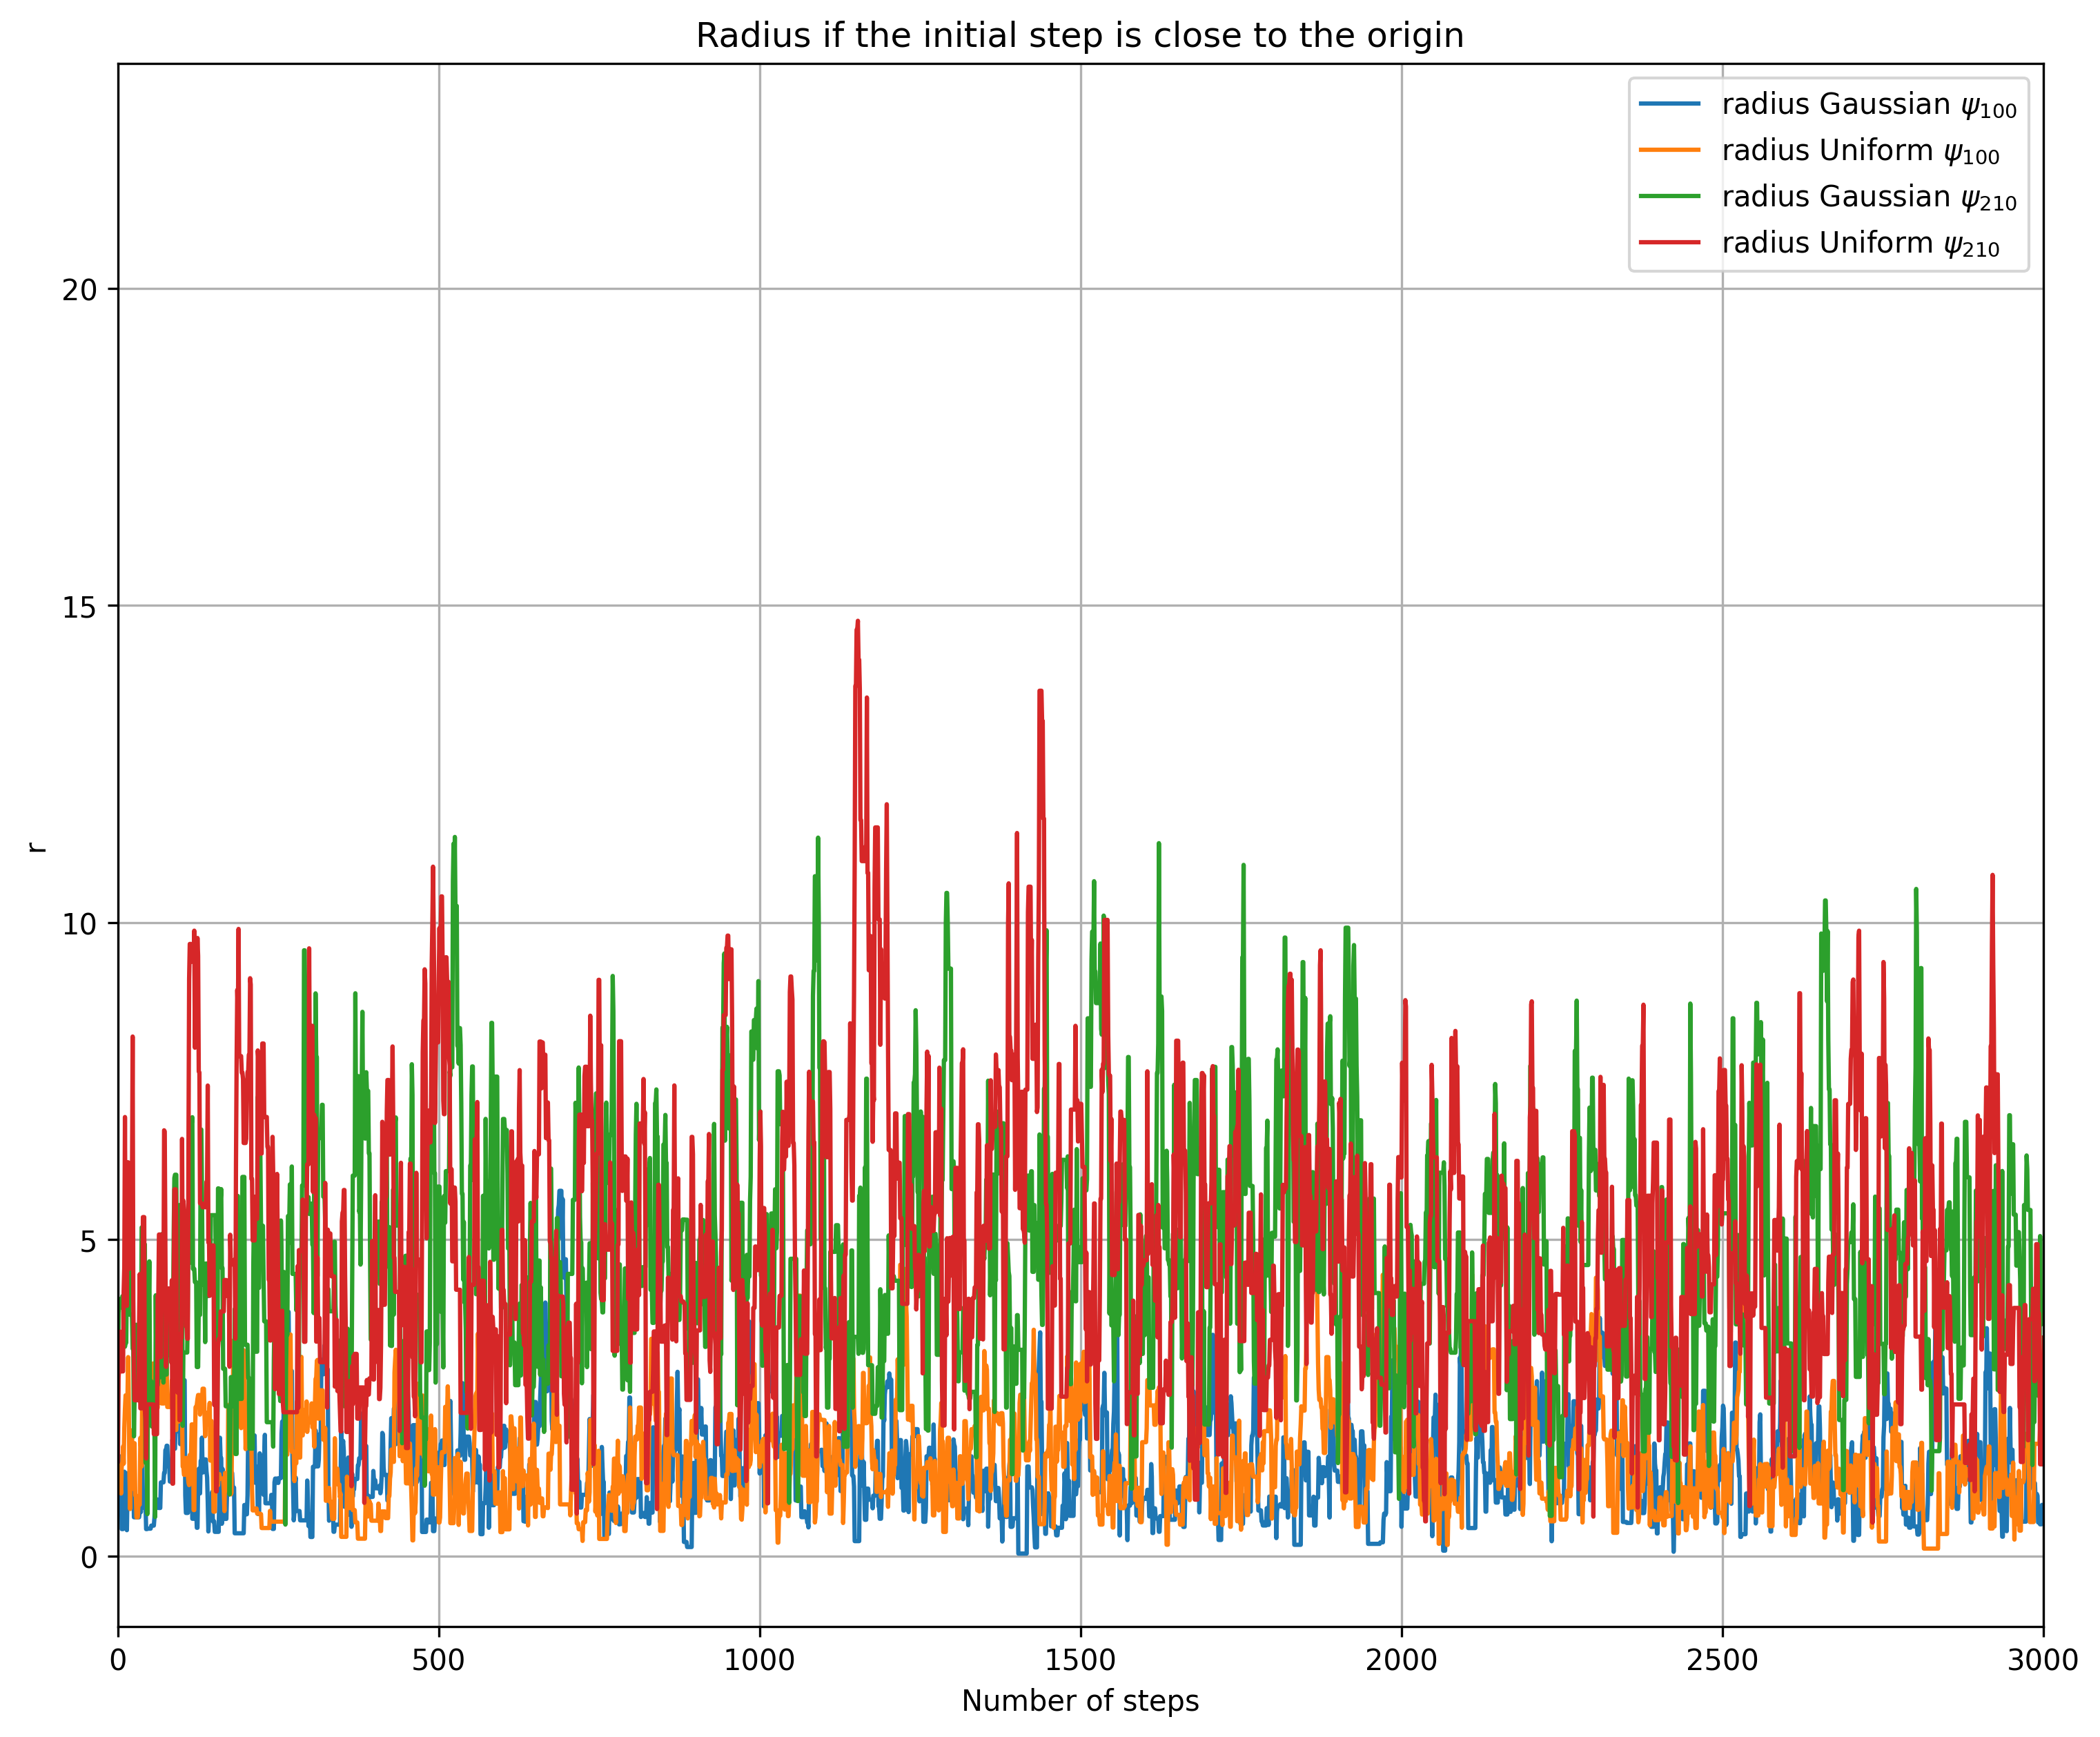

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize 

x, f = np.loadtxt("5.1/close/distance/Normal100NotEQdistance.dat", usecols=(0,1), delimiter=' ', unpack='true')
X, F = np.loadtxt("5.1/close/distance/Uniform100NotEQdistance.dat", usecols=(0,1), delimiter=' ', unpack='true')
xc, fc = np.loadtxt("5.1/close/distance/Normal210NotEQdistance.dat", usecols=(0,1), delimiter=' ', unpack='true')
Xc, Fc = np.loadtxt("5.1/close/distance/Uniform210NotEQdistance.dat", usecols=(0,1), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(12,10),dpi=300)

plt.plot(x,f,label = "radius Gaussian $\psi_{100}$")
plt.plot(X,F,label = "radius Uniform $\psi_{100}$")
plt.plot(xc,fc,label = "radius Gaussian $\psi_{210}$")
plt.plot(Xc,Fc,label = "radius Uniform $\psi_{210}$")

plt.xlim(0,3000)


plt.xlabel('Number of steps')

plt.ylabel('r')


plt.grid(True)


plt.legend()

plt.title("Radius if the initial step is close to the origin")


plt.show()


It is evident that in this case equilibration is not needed.

If the starting point is far from the orgin , for example $ (100 , 0, 0)$

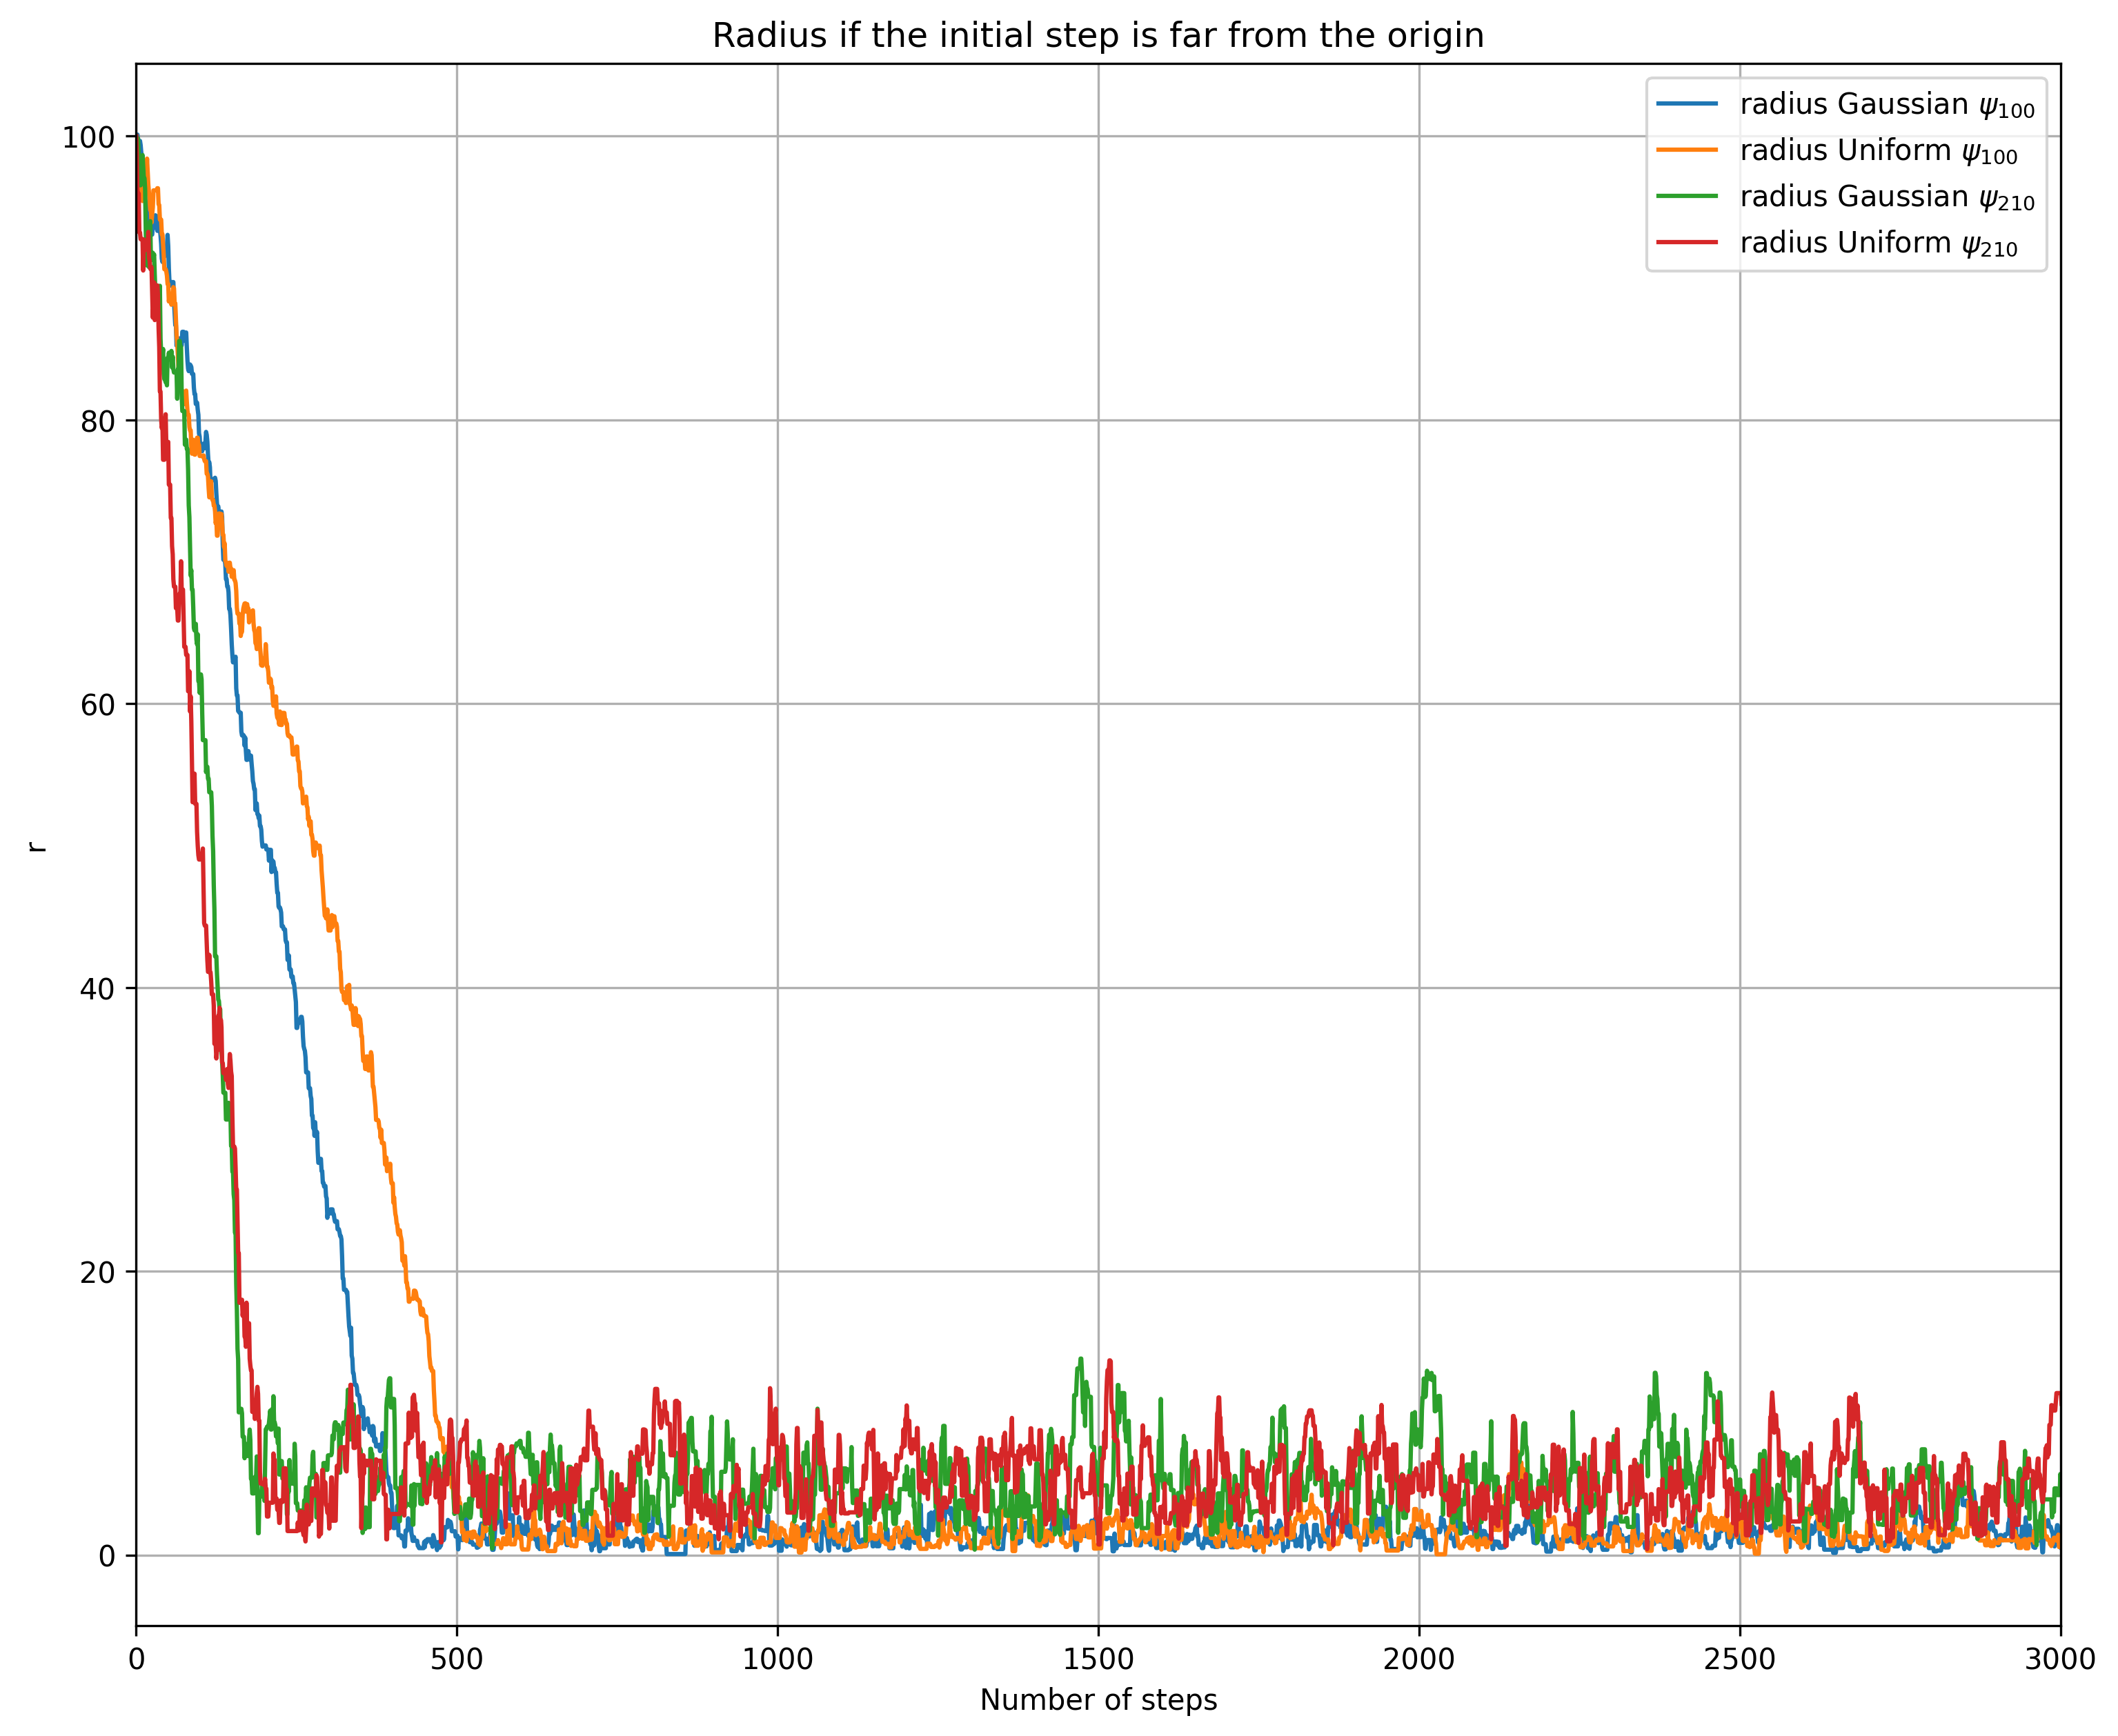

In [2]:
x, f = np.loadtxt("5.1/far/distance/Normal100NotEQdistance.dat", usecols=(0,1), delimiter=' ', unpack='true')
X, F = np.loadtxt("5.1/far/distance/Uniform100NotEQdistance.dat", usecols=(0,1), delimiter=' ', unpack='true')
xc, fc = np.loadtxt("5.1/far/distance/Normal210NotEQdistance.dat", usecols=(0,1), delimiter=' ', unpack='true')
Xc, Fc = np.loadtxt("5.1/far/distance/Uniform210NotEQdistance.dat", usecols=(0,1), delimiter=' ', unpack='true')




fig=plt.figure(figsize=(12,10),dpi=300)



plt.plot(x,f,label = "radius Gaussian $\psi_{100}$")
plt.plot(X,F,label = "radius Uniform $\psi_{100}$")
plt.plot(xc,fc,label = "radius Gaussian $\psi_{210}$")
plt.plot(Xc,Fc,label = "radius Uniform $\psi_{210}$")
plt.xlim(0,3000)

plt.xlabel('Number of steps')
plt.ylabel('r')

plt.grid(True)

plt.legend()
plt.title("Radius if the initial step is far from the origin")








plt.show()


An equilibration is needed.
From the plot, we can safely assume that ,from this starting point, the system is certainly in equilibrium after 1000 steps.  



# Probability Distributions


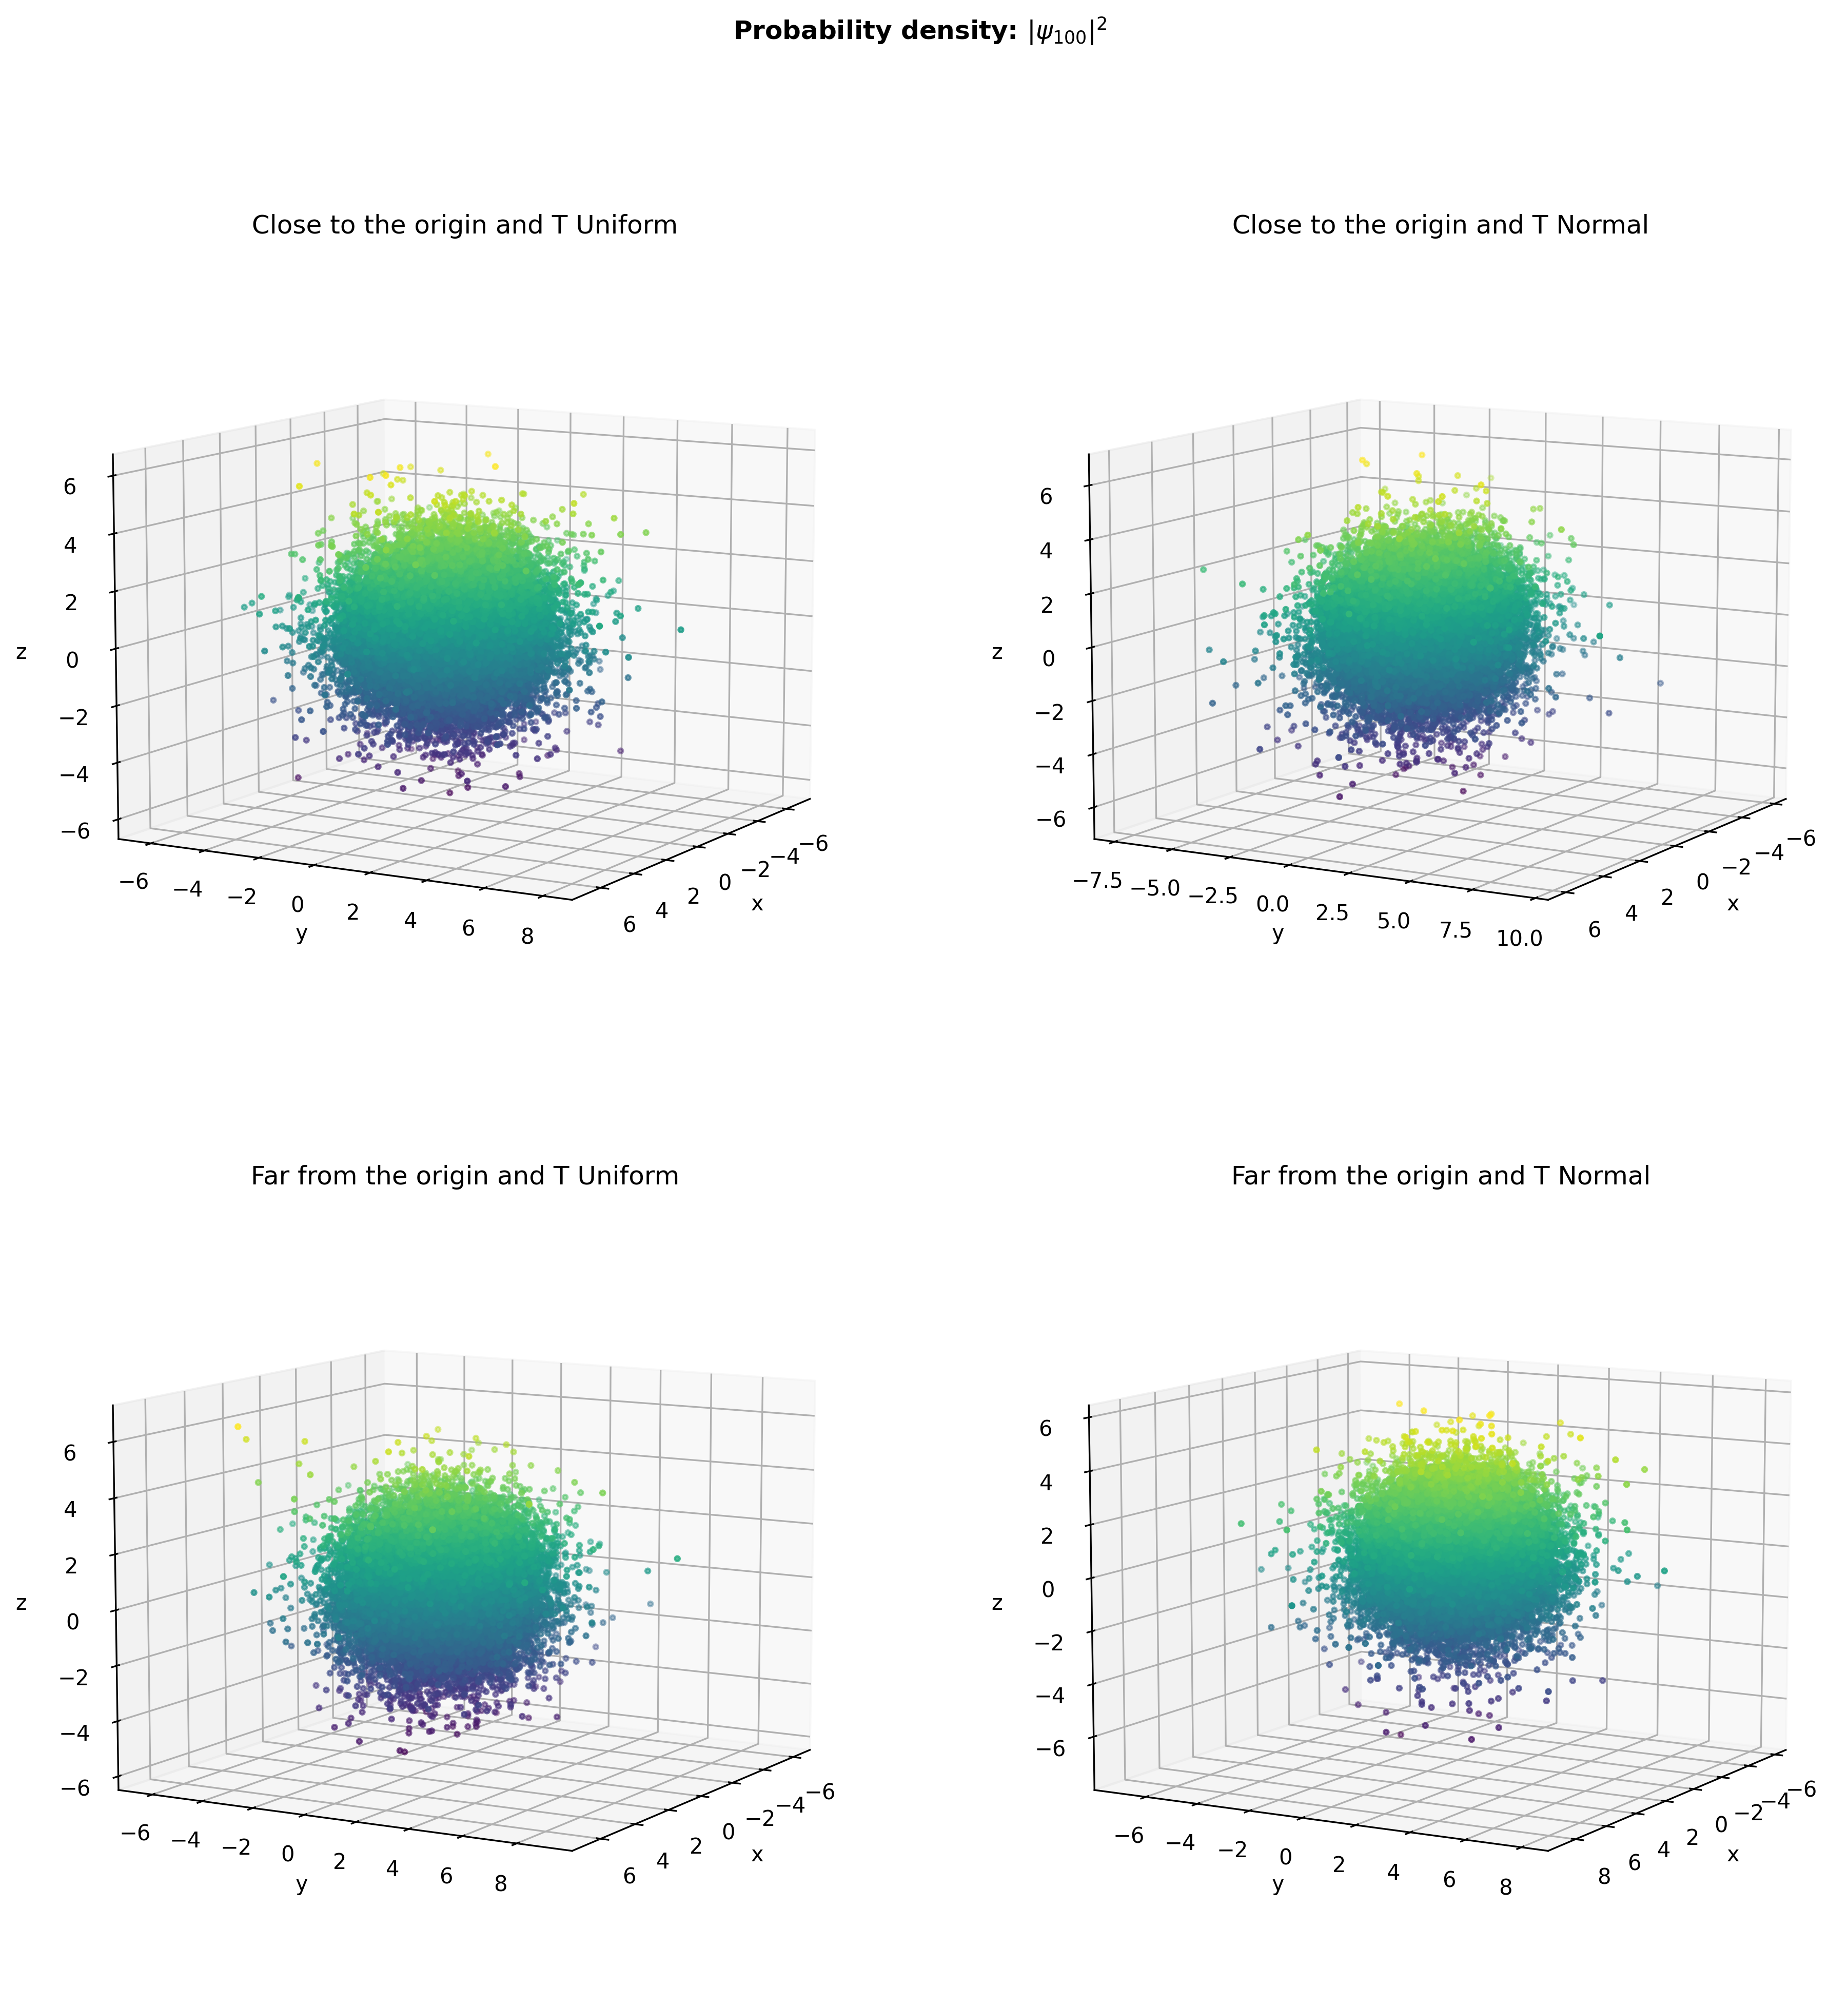

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

i, x,y,z = np.loadtxt("5.1/close/positions/Uniform100conf.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(15,15),dpi=300)
plt.suptitle("Probability density: $|\psi_{100}|^2$",weight="bold")

ax = fig.add_subplot(221, projection = "3d") 

ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title(" Close to the origin and T Uniform")

i, x,y,z = np.loadtxt("5.1/close/positions/Normal100conf.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')



ax = fig.add_subplot(222, projection = "3d") 

ax.scatter(x, y, z, c=z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title(" Close to the origin and T Normal")


i, x,y,z = np.loadtxt("5.1/far/positions/Uniform100conf.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')



ax = fig.add_subplot(223, projection = "3d") 

ax.scatter(x, y, z, c=z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title(" Far from the origin and T Uniform")


i, x,y,z = np.loadtxt("5.1/far/positions/Normal100conf.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')



ax = fig.add_subplot(224, projection = "3d") 

ax.scatter(x, y, z, c=z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title(" Far from the origin and T Normal")
plt.show()



The 4 plots above have a spherical structure as expected from a 1s orbital.

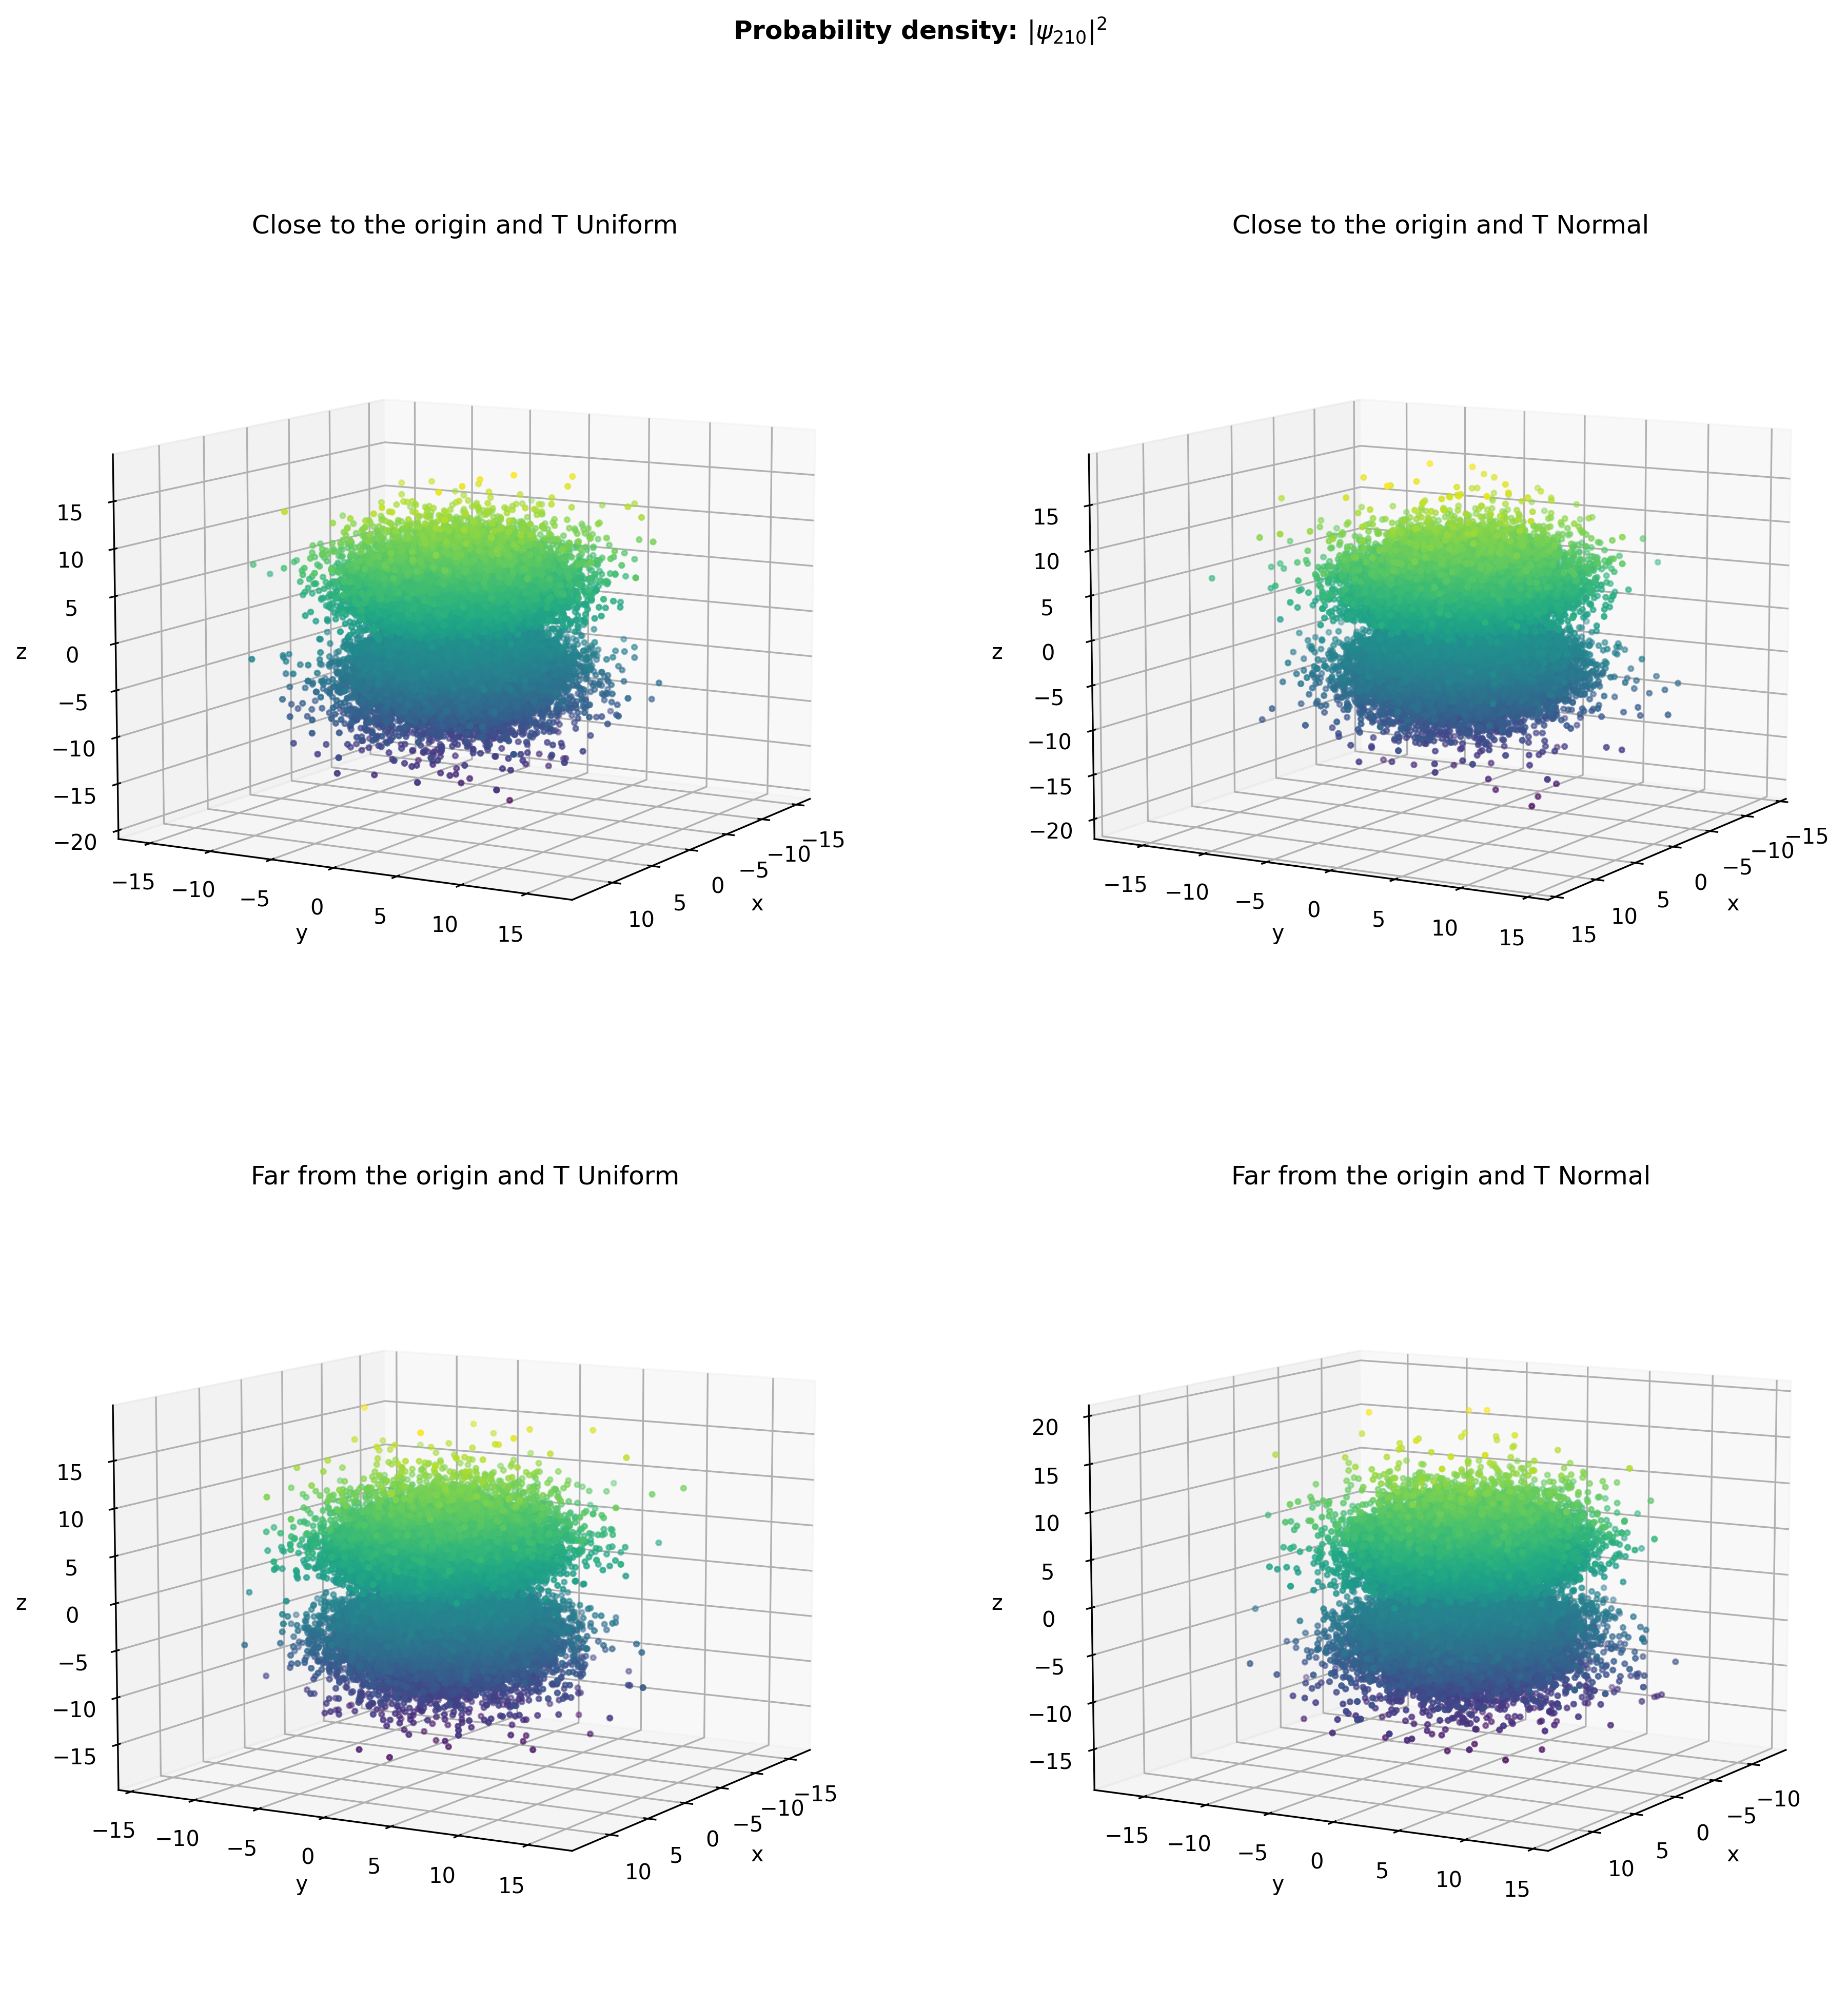

In [4]:

i, x,y,z = np.loadtxt("5.1/close/positions/Uniform210conf.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(15,15),dpi=300)
plt.suptitle("Probability density: $|\psi_{210}|^2$",weight="bold")

ax = fig.add_subplot(221, projection = "3d") 

ax.scatter(x, y, z, c=z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title(" Close to the origin and T Uniform")

i, x,y,z = np.loadtxt("5.1/close/positions/Normal210conf.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')



ax = fig.add_subplot(222, projection = "3d") 

ax.scatter(x, y, z, c=z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title(" Close to the origin and T Normal")


i, x,y,z = np.loadtxt("5.1/far/positions/Uniform210conf.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')



ax = fig.add_subplot(223, projection = "3d") 

ax.scatter(x, y, z, c=z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title(" Far from the origin and T Uniform")


i, x,y,z = np.loadtxt("5.1/far/positions/Normal210conf.dat", usecols=(0,1,2,3), delimiter=' ', unpack='true')



ax = fig.add_subplot(224, projection = "3d") 

ax.scatter(x, y, z, c=z, marker='.')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.title(" Far from the origin and T Normal")
plt.show()



The 4 plots have the structure of a 2p orbital.
We can conclude that, if equilibration is implemented and the correct values of $a$ and $l$ are used, there is no difference if the starting point is close or far from the origin.

# Autocorrelation functions

With the values of the distance from the origin at each step, obtained from the simulations, we can calculate the *autocorrelation function*:
$$\chi(\tau)= \frac{\frac{1}{t-\tau}\sum_{t' = 0}^{t-\tau}x(t')x(t'+\tau)-\frac{1}{t-\tau}\sum_{t' = 0}^{t-\tau}x(t')\times \frac{1}{t-\tau}\sum_{t' = 0}^{t-\tau}x(t'+\tau)}{\frac{1}{t}\sum_{t' = 0}^{t}x^2(t')-\left(\frac{1}{t}\sum_{t' = 0}^{t}x(t')\right)^2} \, ,$$



To estimate the correlation time $t_c$ we fit $\chi(\tau)$ with the function $e^{-\frac{\tau}{t_c}}$.

In [5]:

def autocorrelation(array,lag):
    n = len(array)
    sum1 = 0.0
    sumt=0.0
    sumlag=0.0
    
    for i in range(n-lag):
        sum1 += array[i]*array[i+lag]
        sumt+=array[i]
        sumlag+=array[i+lag]
    
    sum1/=(n-lag)
    sumt/=(n-lag)
    sumlag/=(n-lag)
    
    sumsquared=0.0
    mean=0.0
    
    for k in range(n):
        sumsquared+=array[k]*array[k]
        mean+=array[k]
    
    sumsquared/=n
    mean/=n
    
    return (sum1-sumt*sumlag)/(sumsquared-mean*mean)


close : correlation time for Normal100  =  11.388334769380117
close : correlation time for Normal210  =  9.628584633294363
close : correlation time for Uniform100  =  10.56088173143733
close : correlation time for Uniform210  =  9.782604575532734
far : correlation time for Normal100  =  11.372370828274422
far : correlation time for Normal210  =  10.478865925471904
far : correlation time for Uniform100  =  11.395521741420056
far : correlation time for Uniform210  =  9.379131851879436


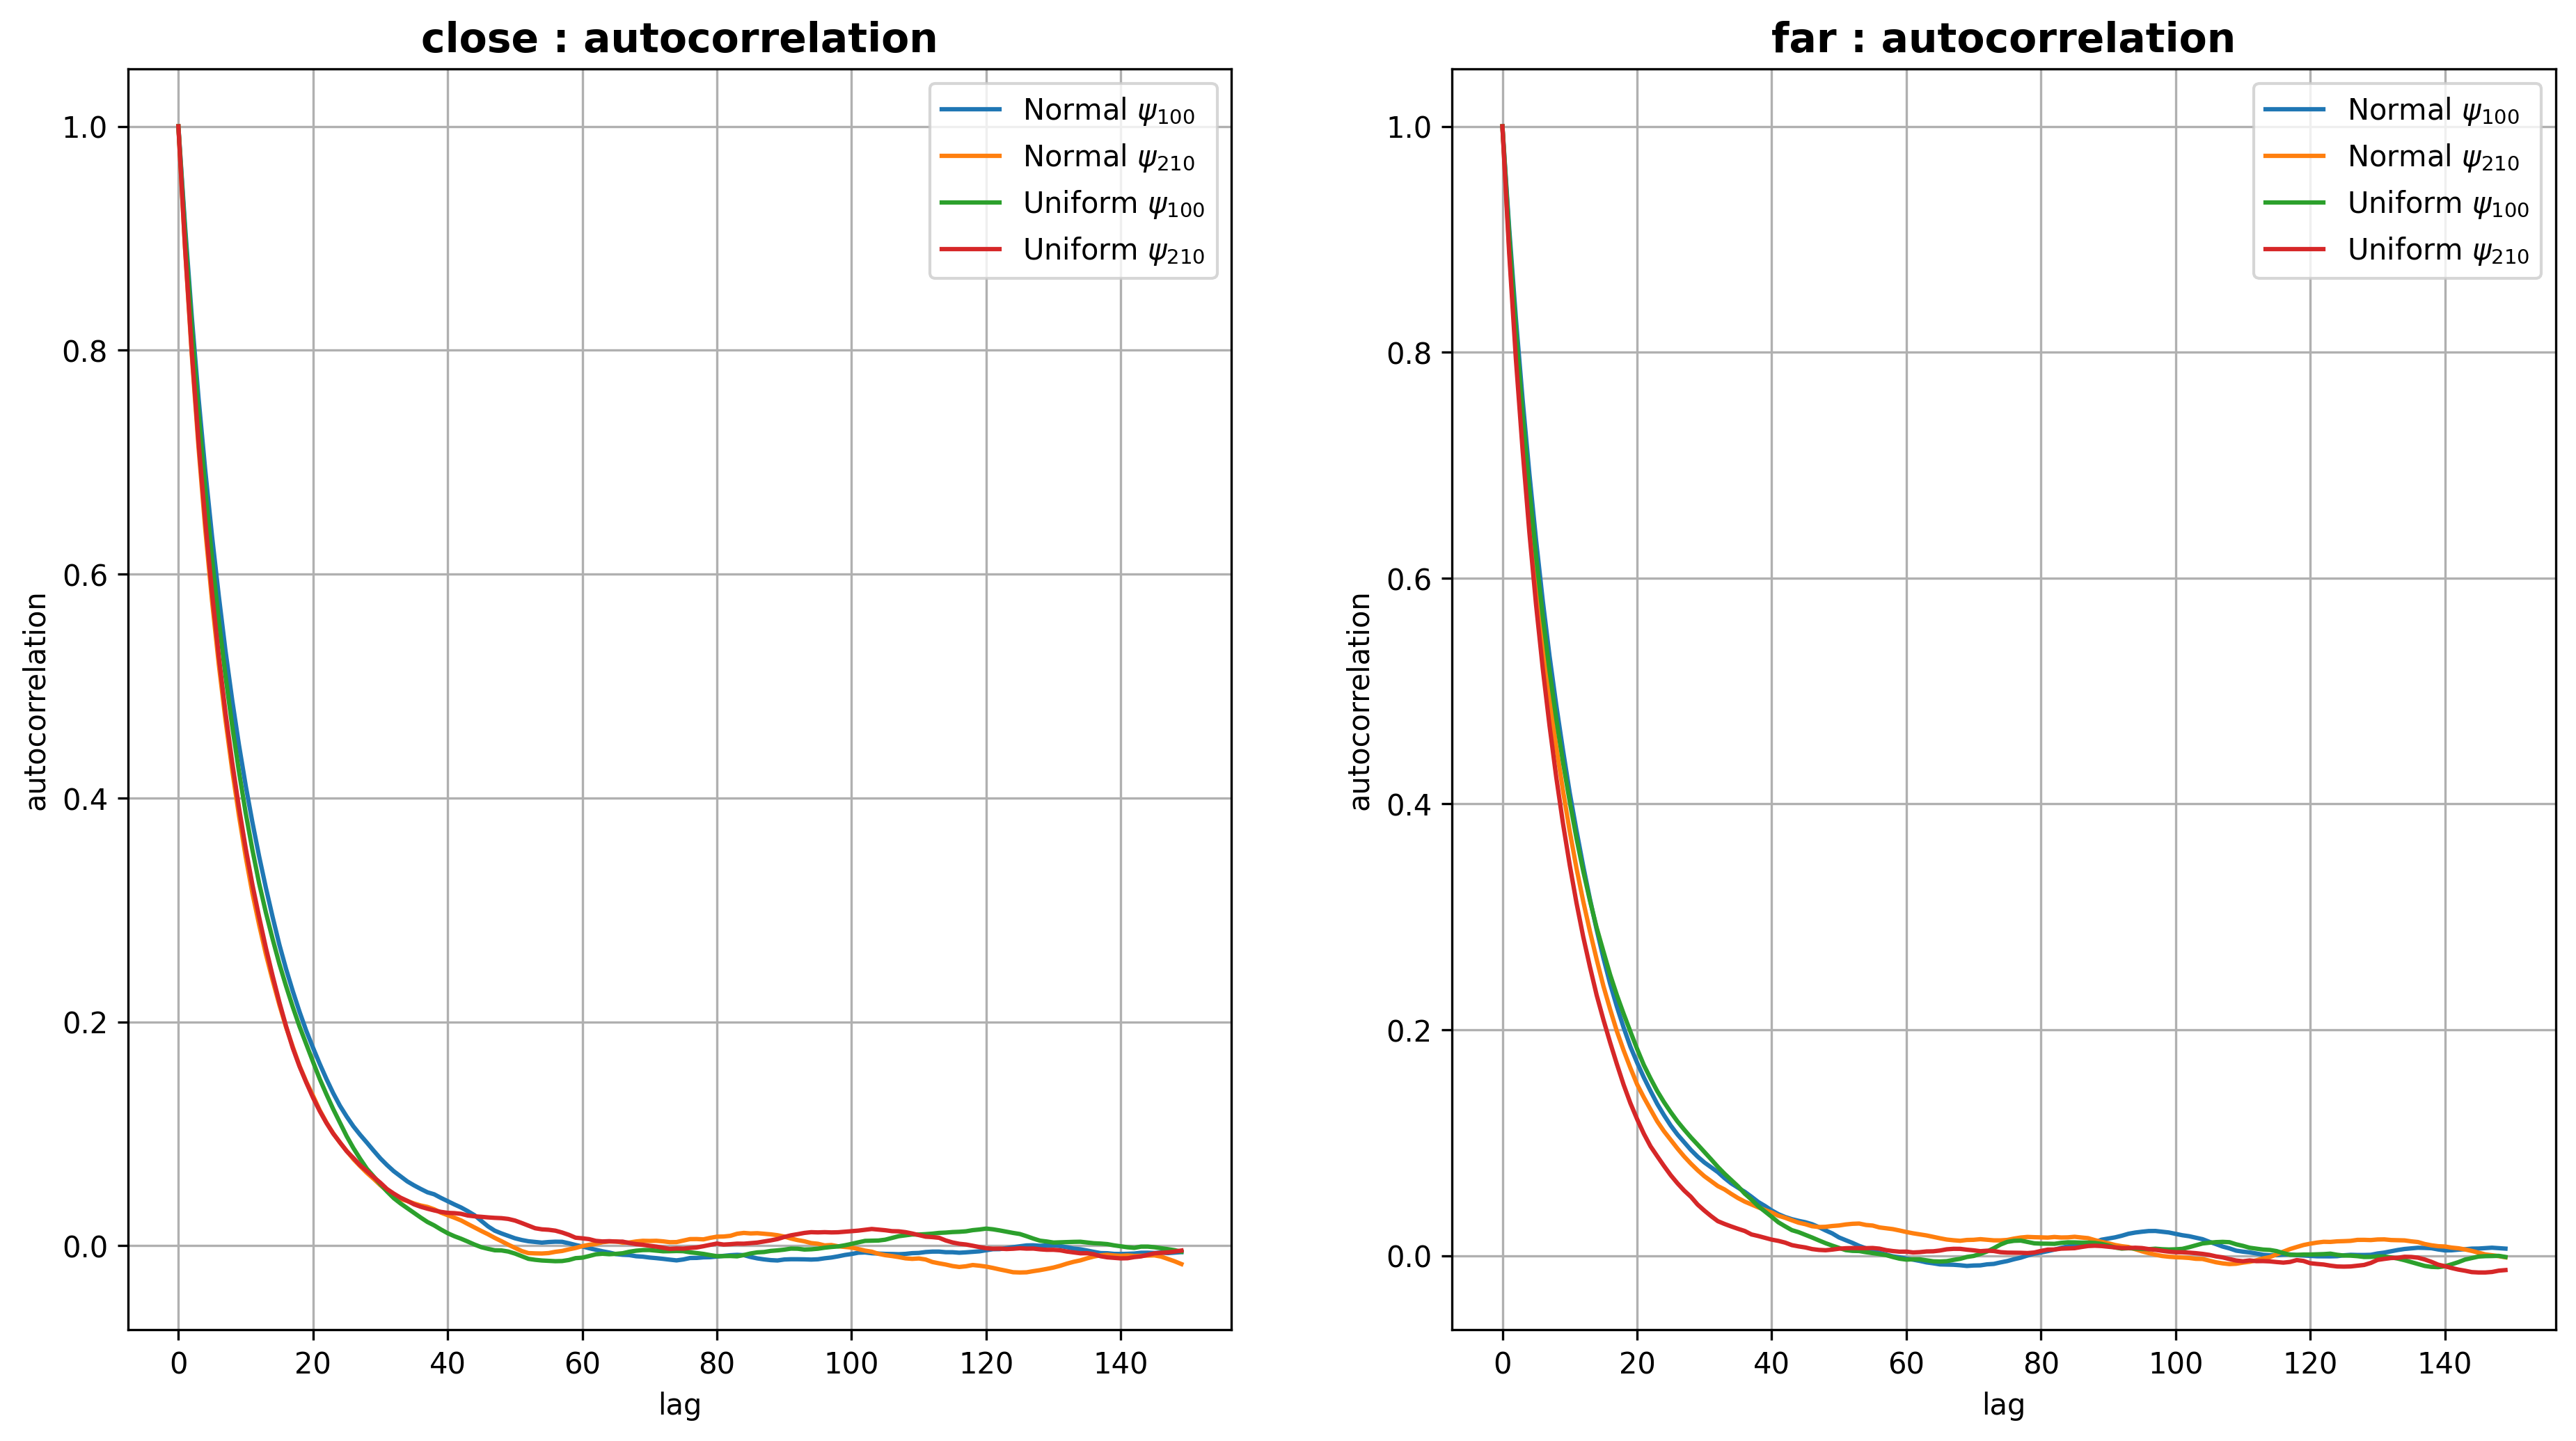

In [6]:
folder=['close','far']
Titles=["Normal $\psi_{100}$","Normal $\psi_{210}$","Uniform $\psi_{100}$","Uniform $\psi_{210}$"]
file=["Normal100","Normal210","Uniform100","Uniform210"]


def f(t,tc):  # defining the fitting function
    return np.exp(-(t/tc)) 

fig=plt.figure(figsize=(15,8),dpi=300)
for i in folder:
    
    plt.subplot(1,2,folder.index(i)+1)
    for j in file:
        x  = np.loadtxt("5.1/"+i+"/distance/"+j+"distance.dat", usecols=(1),max_rows=100000, delimiter=' ', unpack='true')
        
    
        maxlag=150
        autocorrelation_epot=[autocorrelation(x,lag) for lag in range(maxlag)]
        plt.plot(autocorrelation_epot, label=Titles[file.index(j)])
    
        p0=1.0

        popt,pcov= scipy.optimize.curve_fit(f,range(maxlag),autocorrelation_epot,p0)
        perr= np.sqrt(np.diag(pcov))
        print(i+" : correlation time for "+j+"  = ",popt[0])
    
        #plt.plot(f(range(maxlag),*popt) , color="red",label="fit")
    plt.xlabel('lag')
    plt.ylabel('autocorrelation')
    plt.title(i+" : autocorrelation",weight="bold",size=14)
    plt.grid(True)
    plt.legend()

plt.show()

# Average values and their uncertainties

After the generation of $M$ points, for each method and for each starting point, it is possible to apply the *Data Blocking* method.
Since the correlation time $t_c\approx 10$ for all cases, to have uncorrelated blocks the number of steps in each block should be : $L\geq 2t_c\approx 20$.


The values used are:
- Total points: $M=1000000$;
- Number of blocks: $N=100$;
- Number of steps in each block : $L=10000$.


# Plots with probability density:$|\psi_{100}|^2$

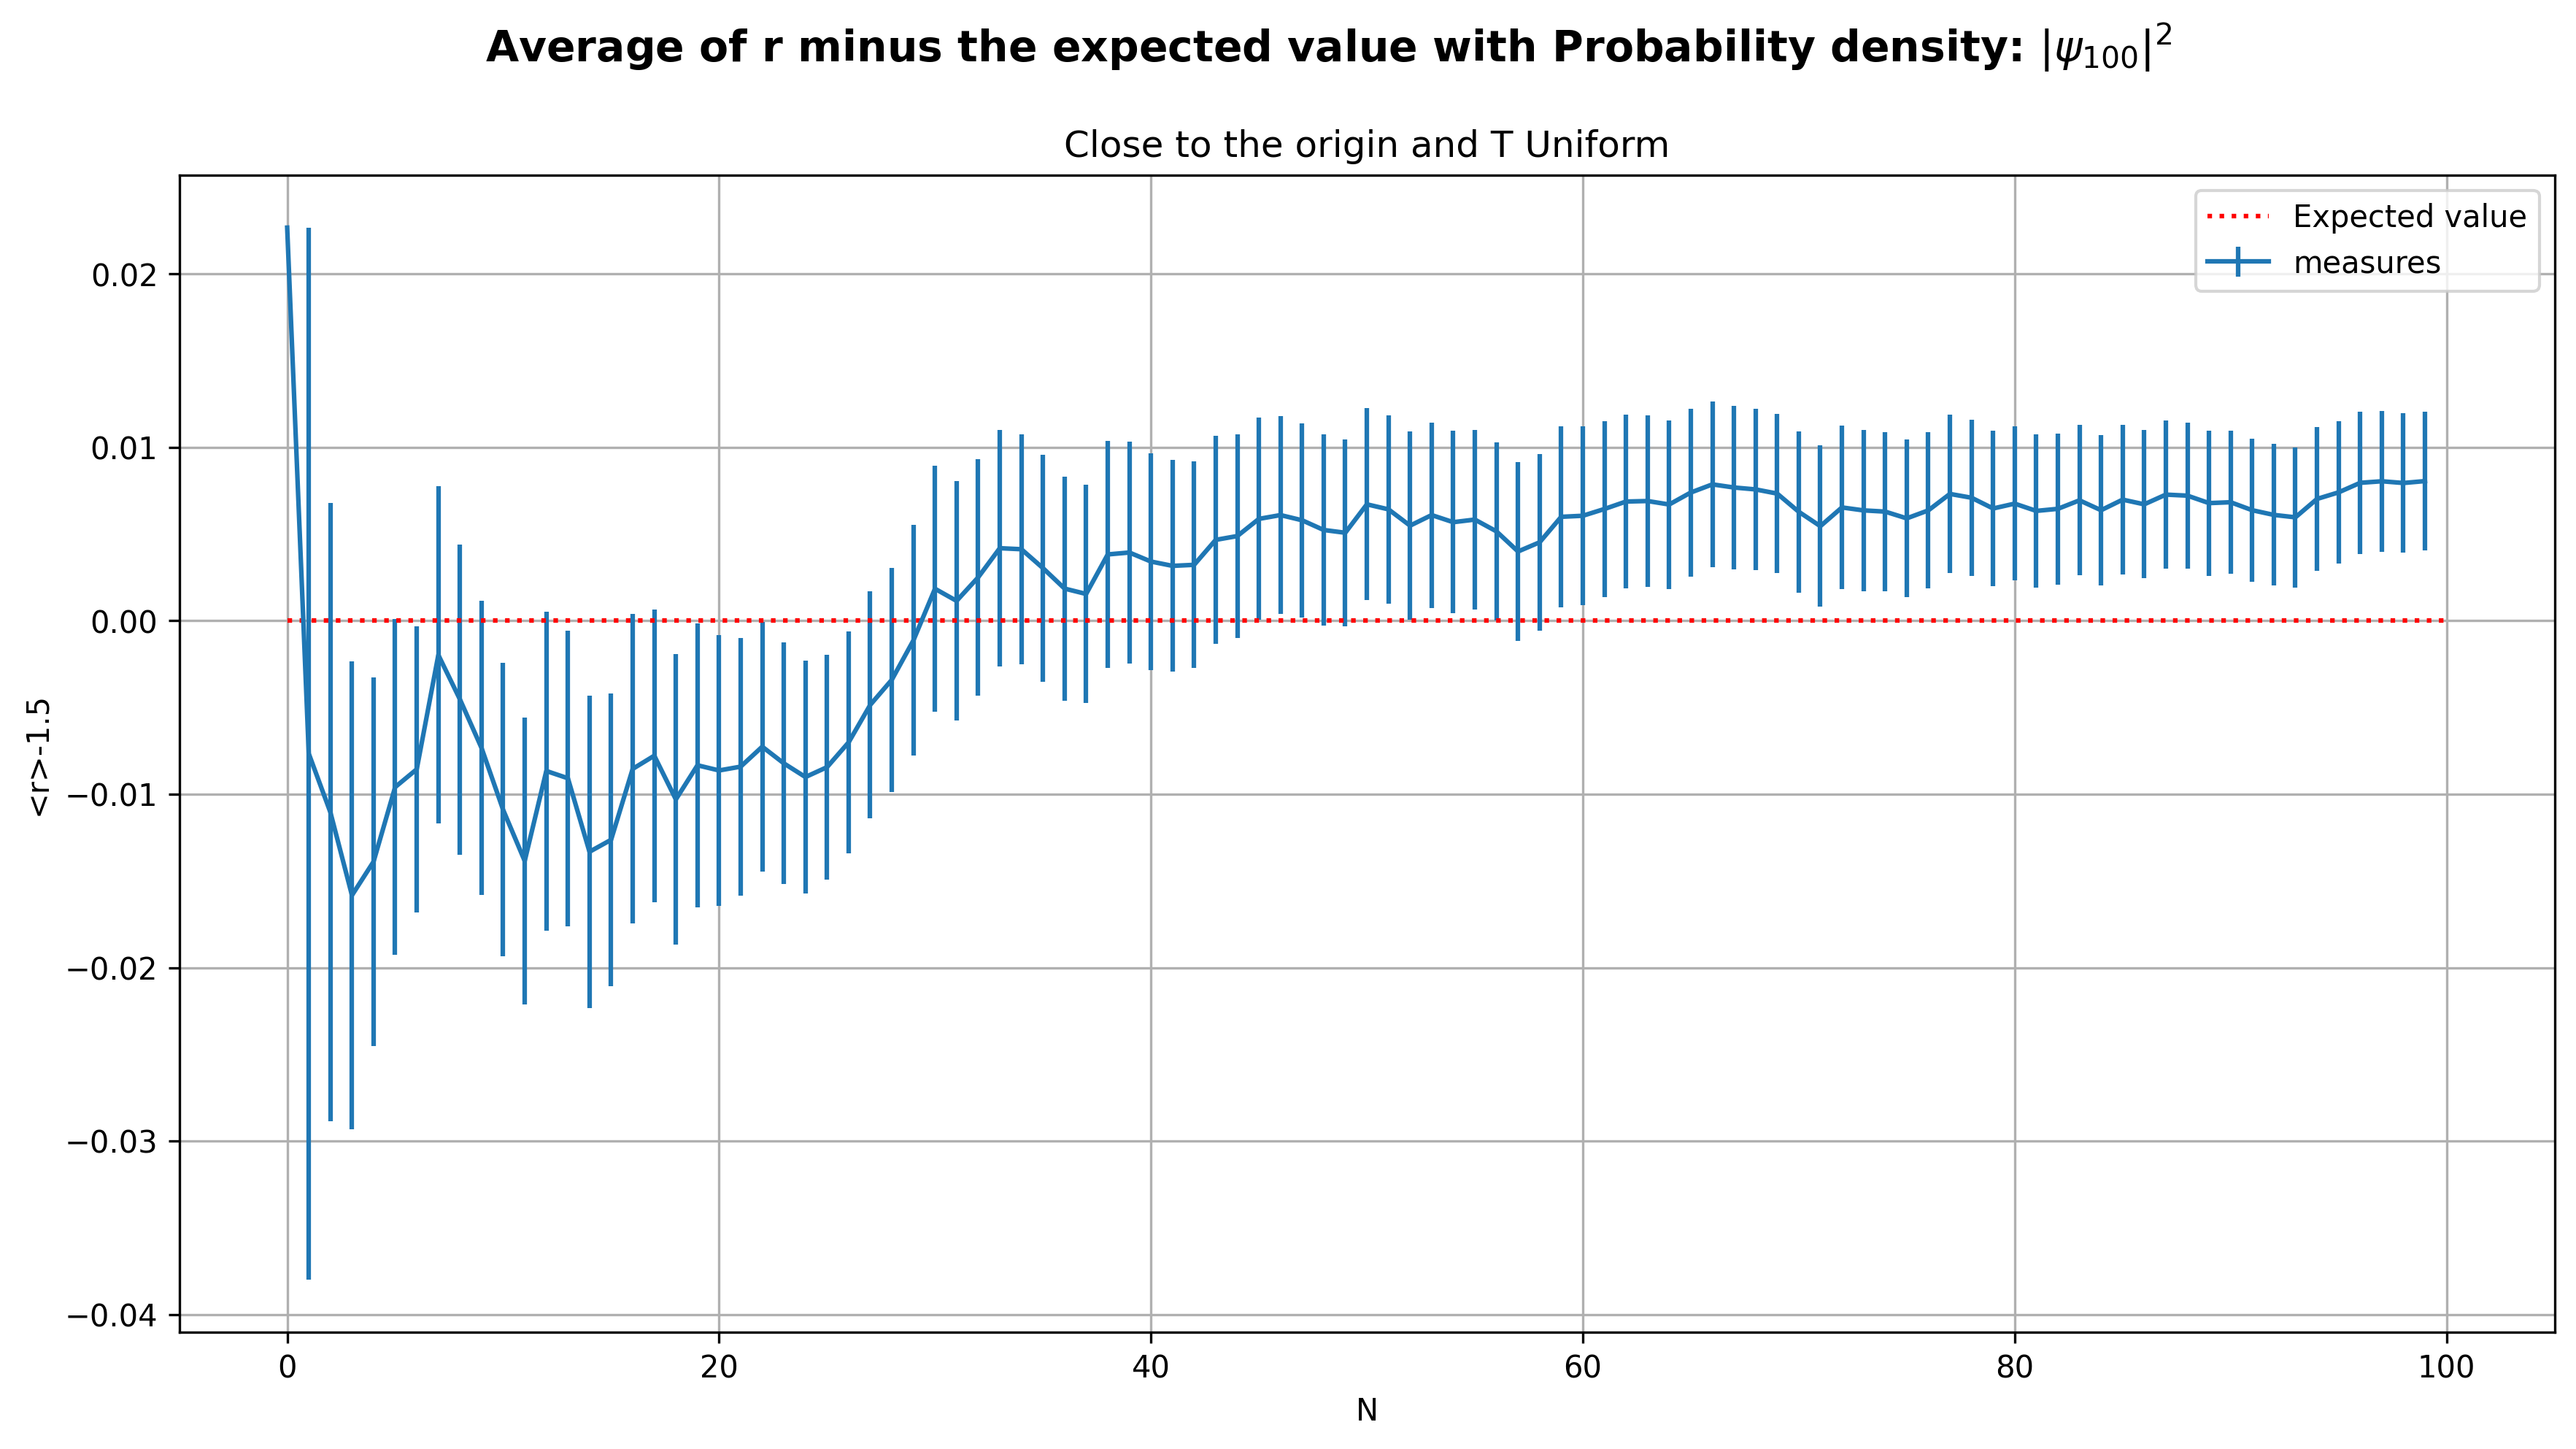

r average for N=100:  1.508  +-  0.004


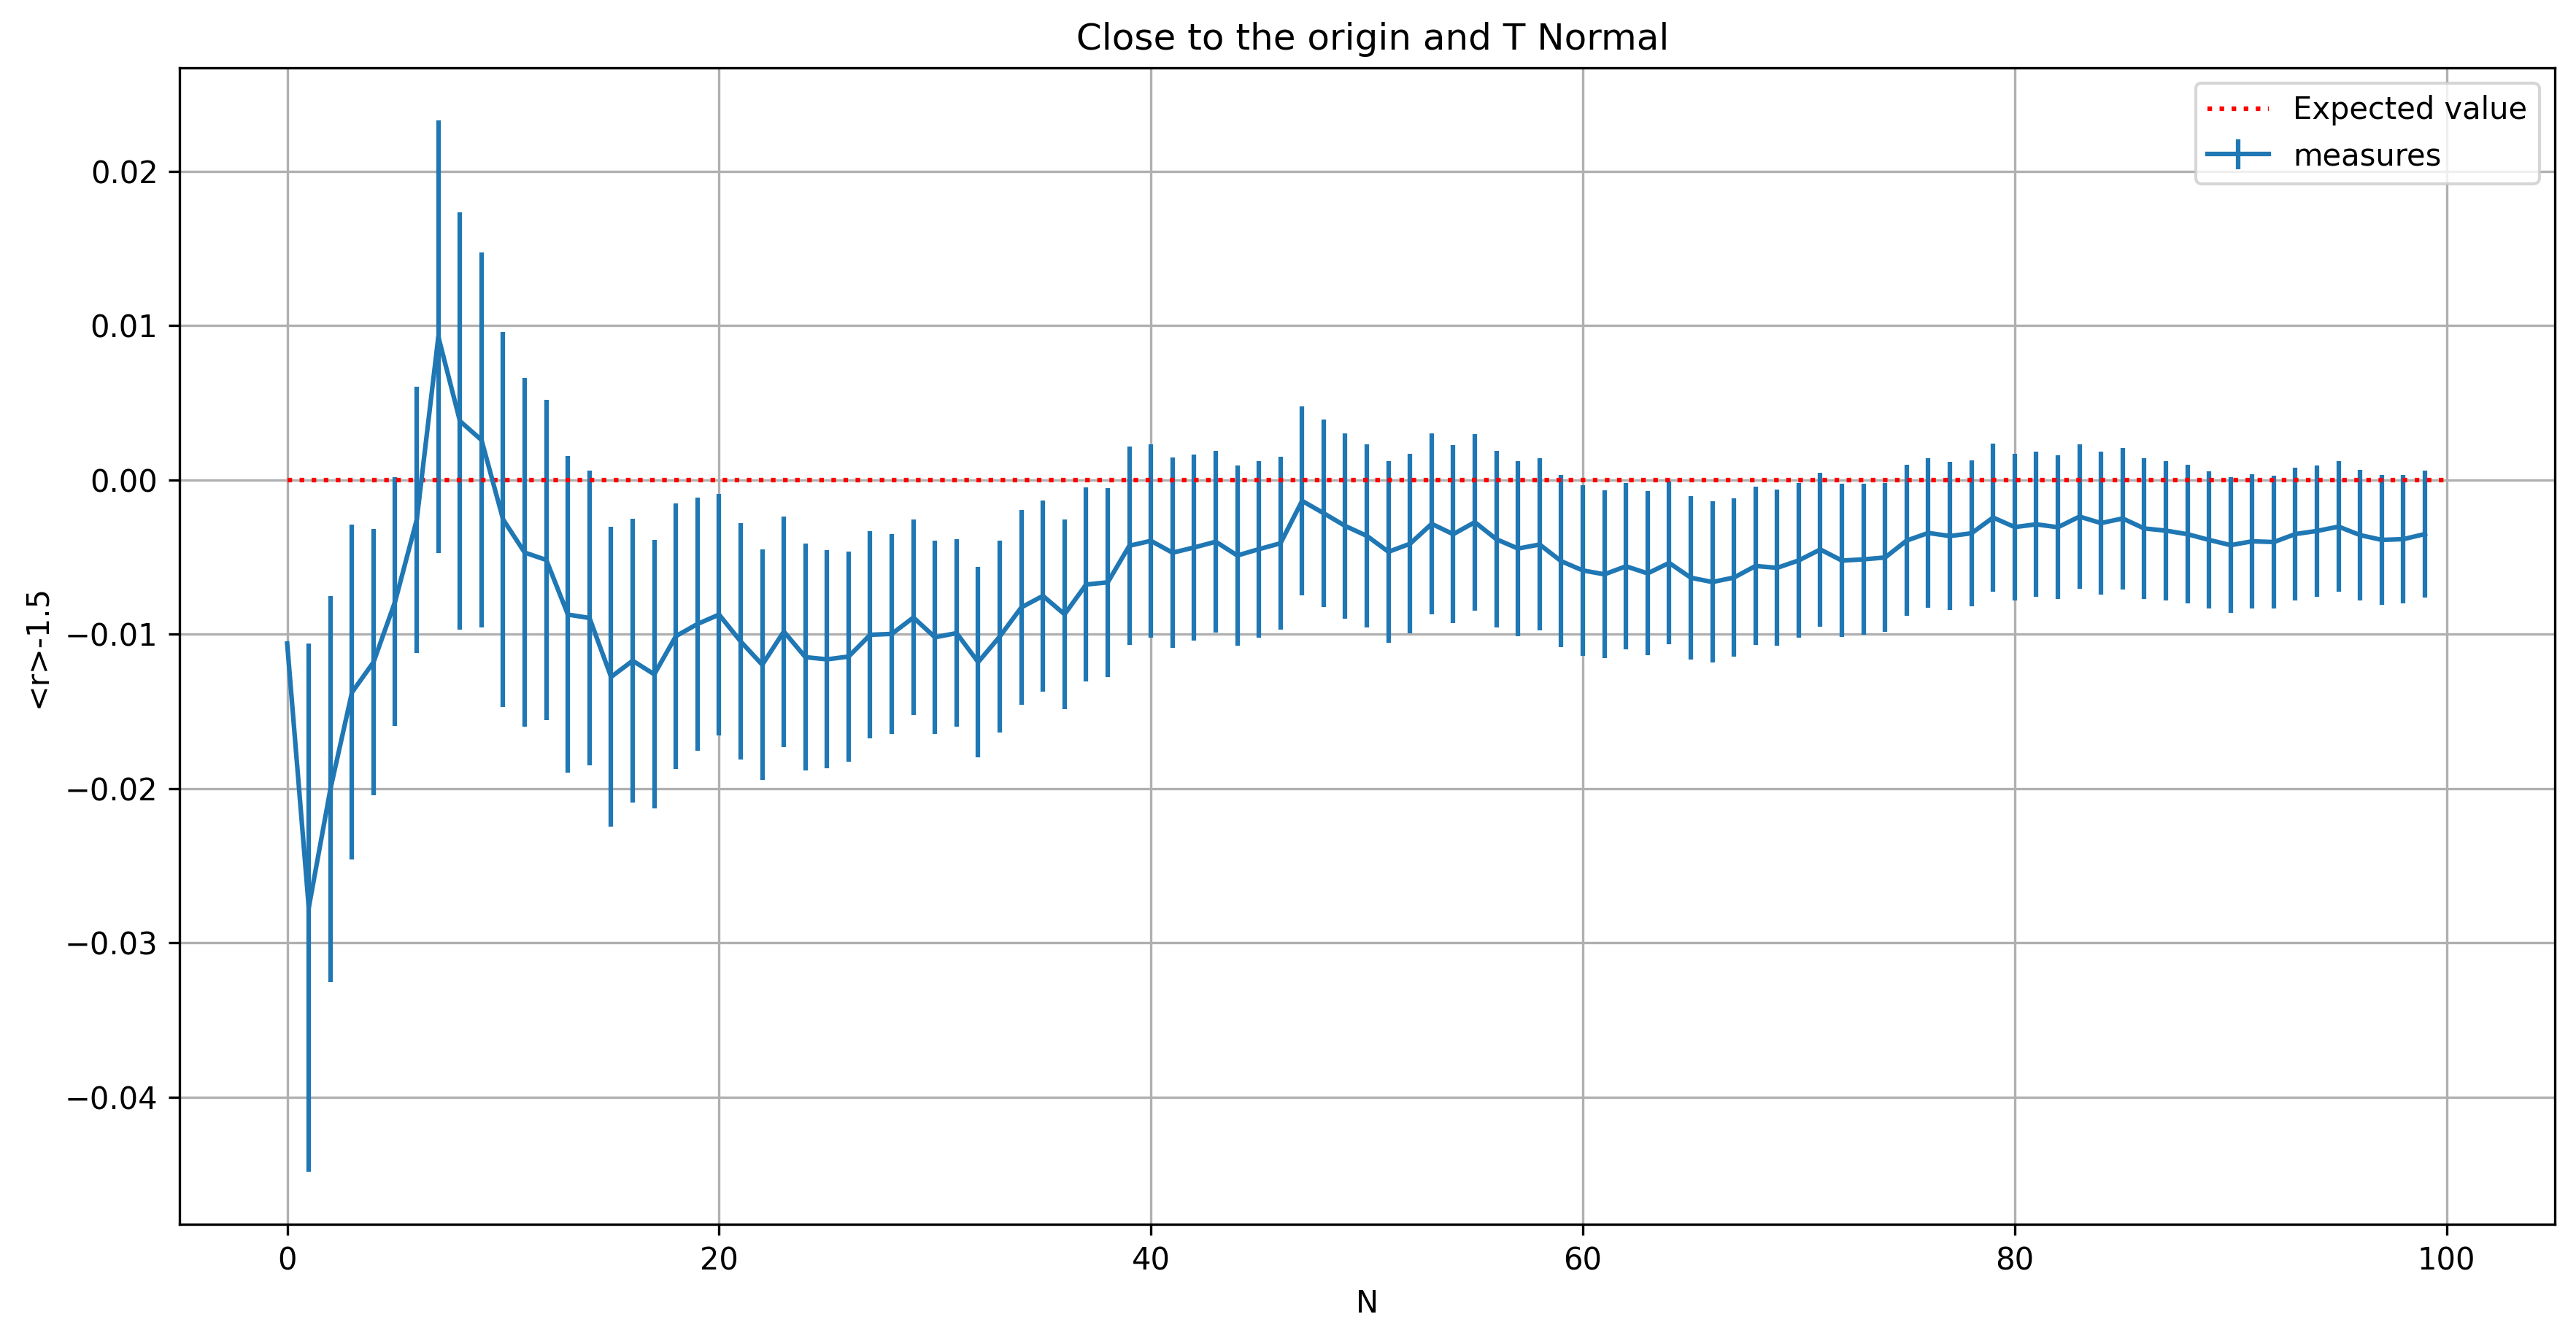

r average for N=100:  1.496  +-  0.004


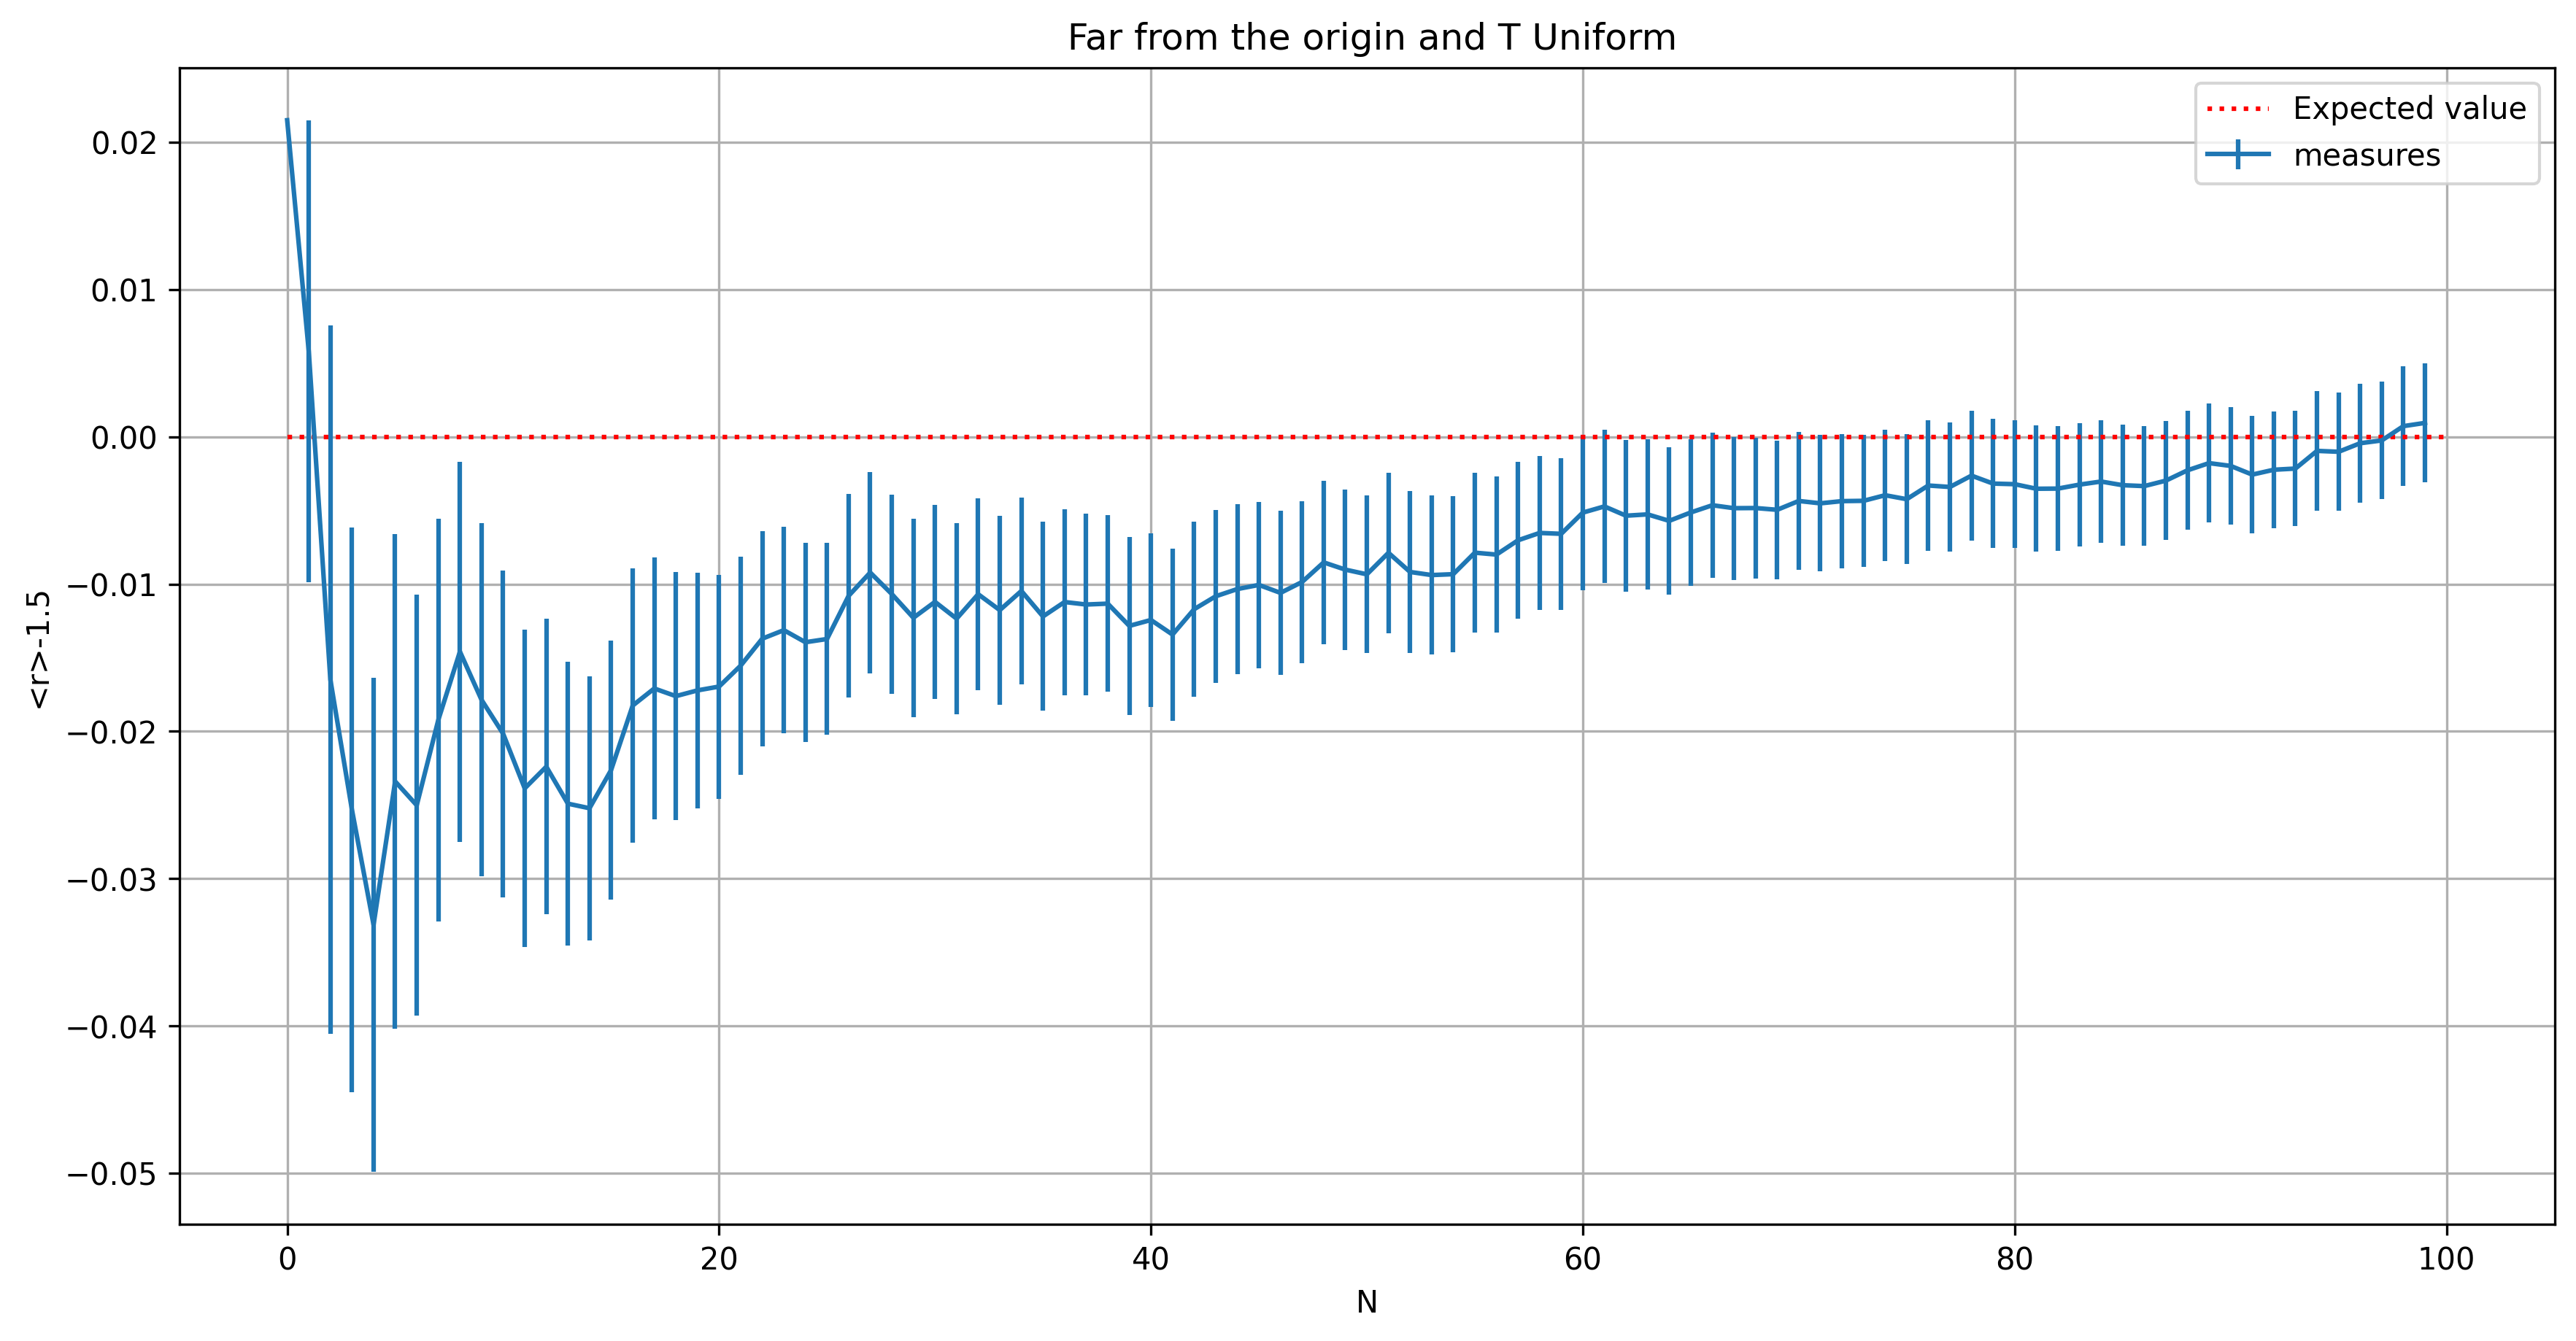

r average for N=100:  1.501  +-  0.004


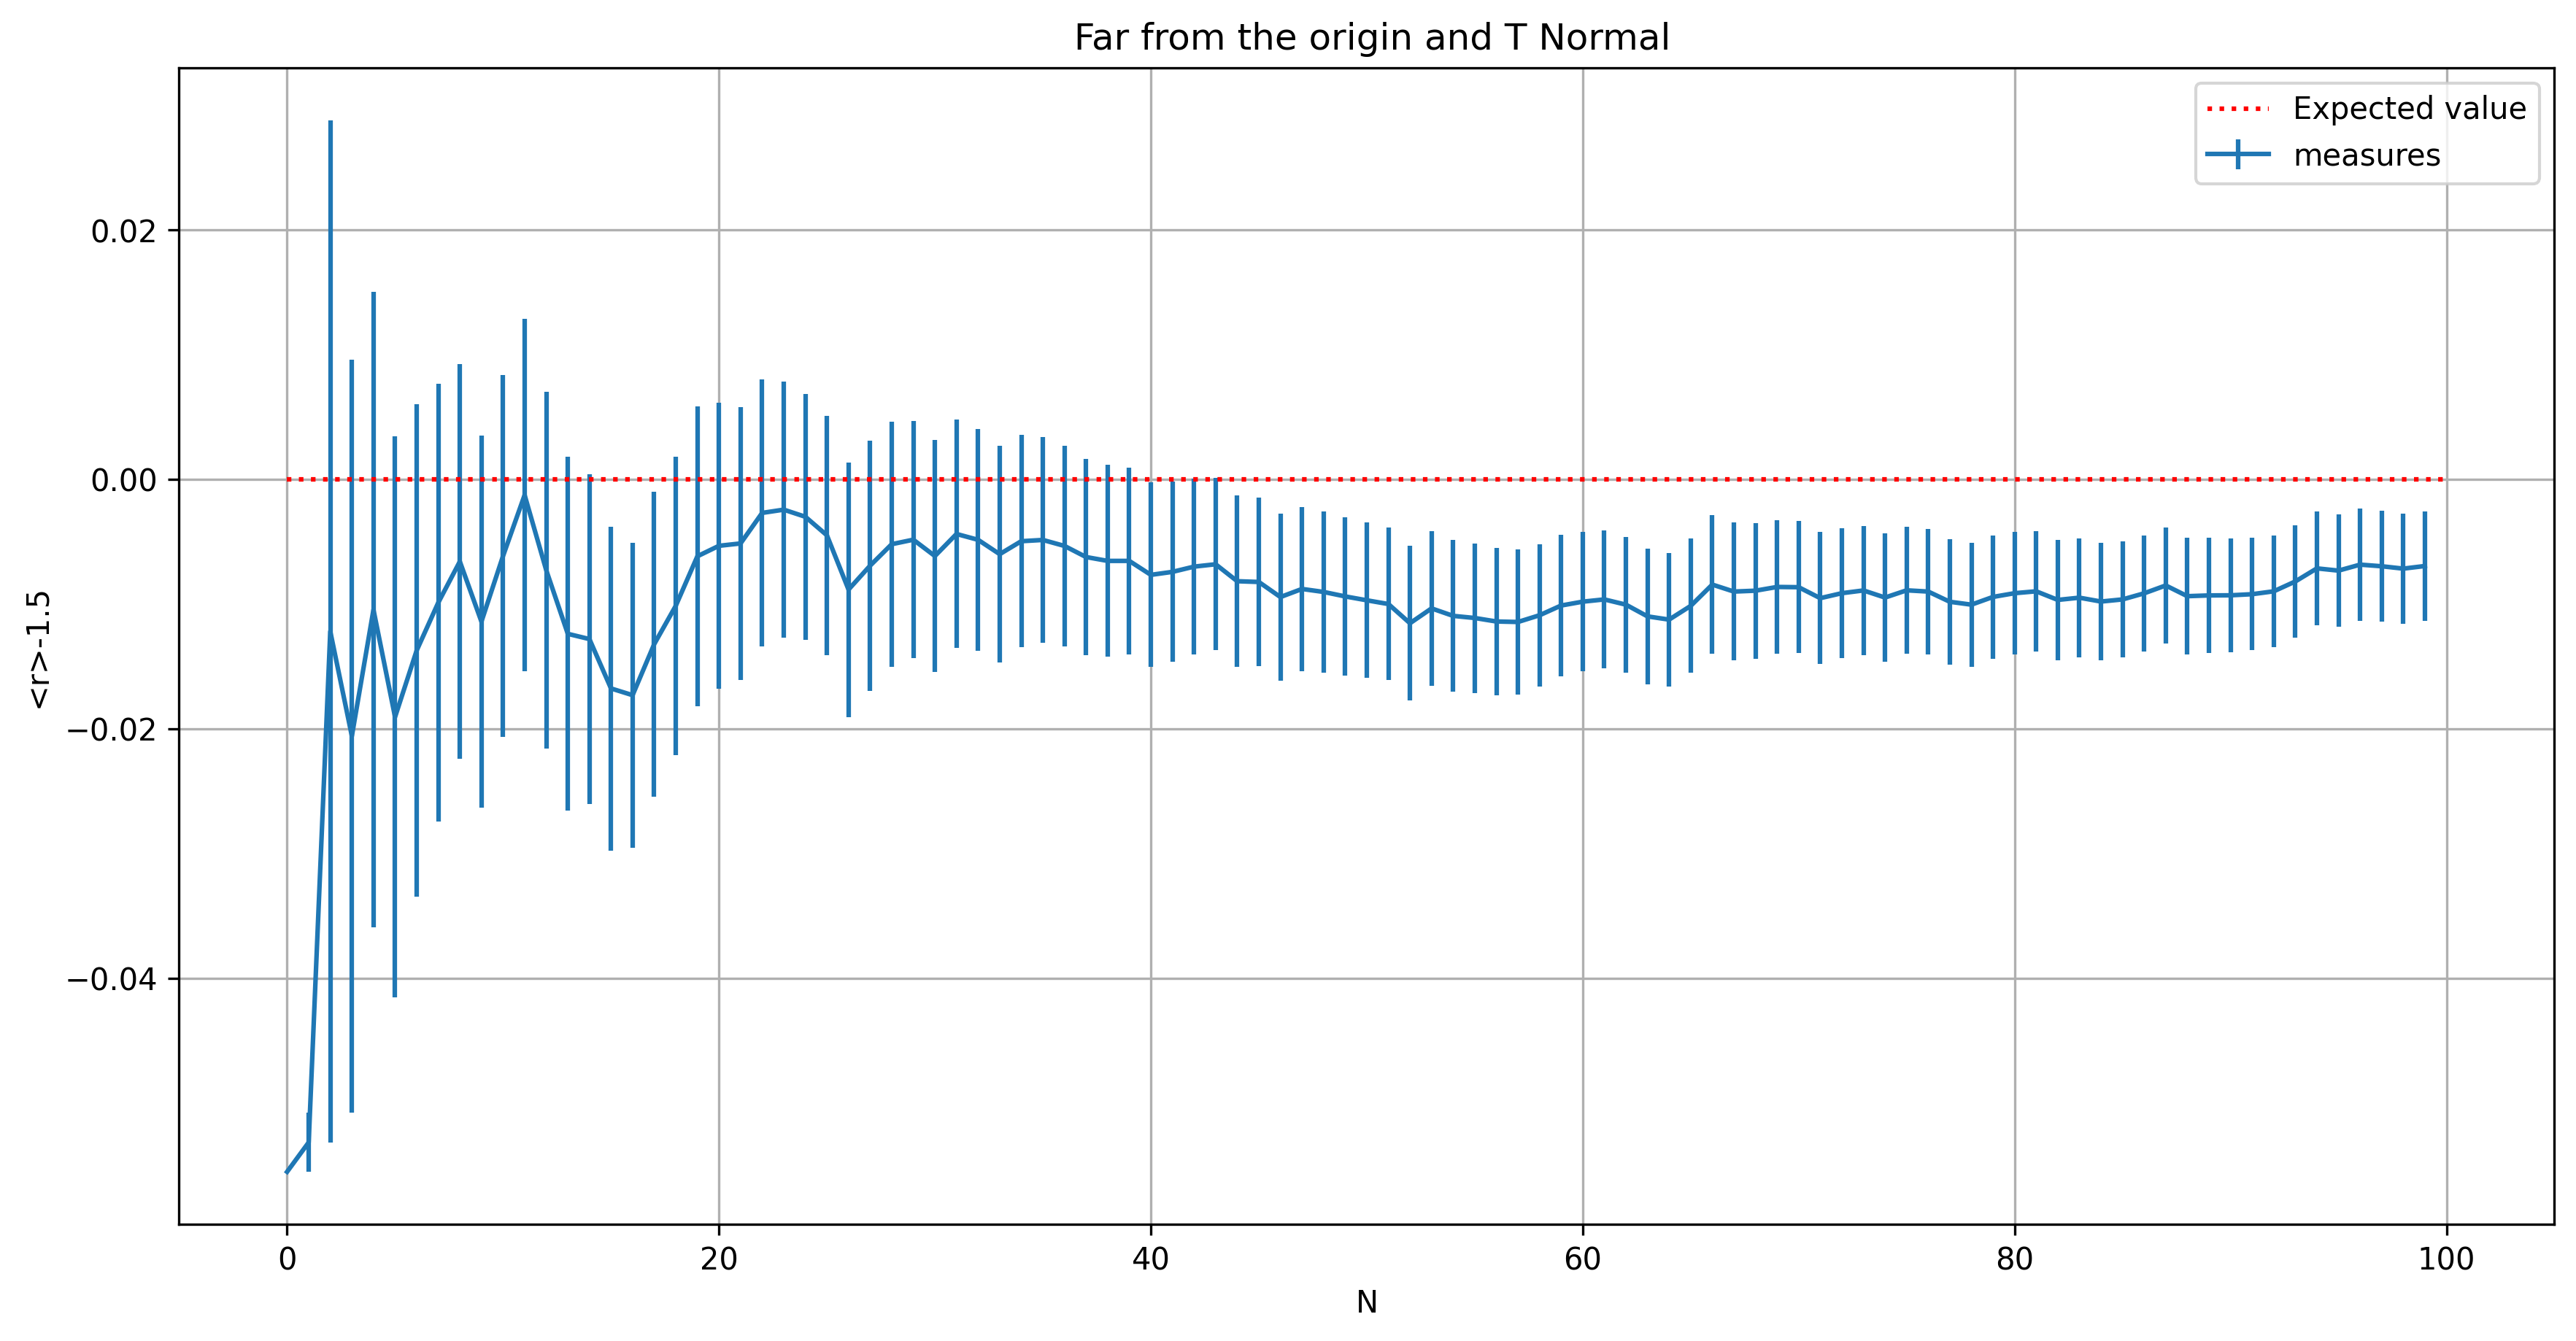

r average for N=100:  1.493  +-  0.004


In [7]:

fig=plt.figure(figsize=(14,7),dpi=300)
fig.suptitle("Average of r minus the expected value with Probability density: $|\psi_{100}|^2$",weight='bold',fontsize='14')
i, x, error = np.loadtxt("5.1/close/Uniform100output.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(i,x-1.5,error,label = "measures")
plt.hlines(
    0,
    0, # Start of horizontal line
    100, # End == total number of trials, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)


plt.legend()
plt.xlabel('N')
plt.ylabel('<r>-1.5')
plt.grid(True)
plt.title("Close to the origin and T Uniform")

plt.show()
print("r average for N=100: ","{:.4}".format(x[99])," +- ", "{:.1}".format(error[99]))



i, x, error = np.loadtxt("5.1/close/Normal100output.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(14,7),dpi=300)

plt.errorbar(i,x-1.5,error,label = "measures")
plt.hlines(
    0,
    0, # Start of horizontal line
    100, # End == total number of trials, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.legend()
plt.xlabel('N')
plt.ylabel('<r>-1.5')
plt.grid(True)
plt.title(" Close to the origin and T Normal")
plt.show()
print("r average for N=100: ","{:.4}".format(x[99])," +- ", "{:.1}".format(error[99]))


i, x, error = np.loadtxt("5.1/far/Uniform100output.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(14,7),dpi=300)

plt.errorbar(i,x-1.5,error,label = "measures")
plt.hlines(
    0,
    0, # Start of horizontal line
    100, # End == total number of trials, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.legend()
plt.xlabel('N')
plt.ylabel('<r>-1.5')
plt.grid(True)
plt.title(" Far from the origin and T Uniform")
plt.show()
print("r average for N=100: ","{:.4}".format(x[99])," +- ", "{:.1}".format(error[99]))


i, x, error = np.loadtxt("5.1/far/Normal100output.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(14,7),dpi=300)

plt.errorbar(i,x-1.5,error,label = "measures")
plt.hlines(
    0,
    0, # Start of horizontal line
    100, # End == total number of trials, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.legend()
plt.xlabel('N')
plt.ylabel('<r>-1.5')
plt.grid(True)
plt.title(" Far from the origin and T Normal")

plt.show()
print("r average for N=100: ","{:.4}".format(x[99])," +- ", "{:.1}".format(error[99]))


# Plots with probability density:$|\psi_{210}|^2$

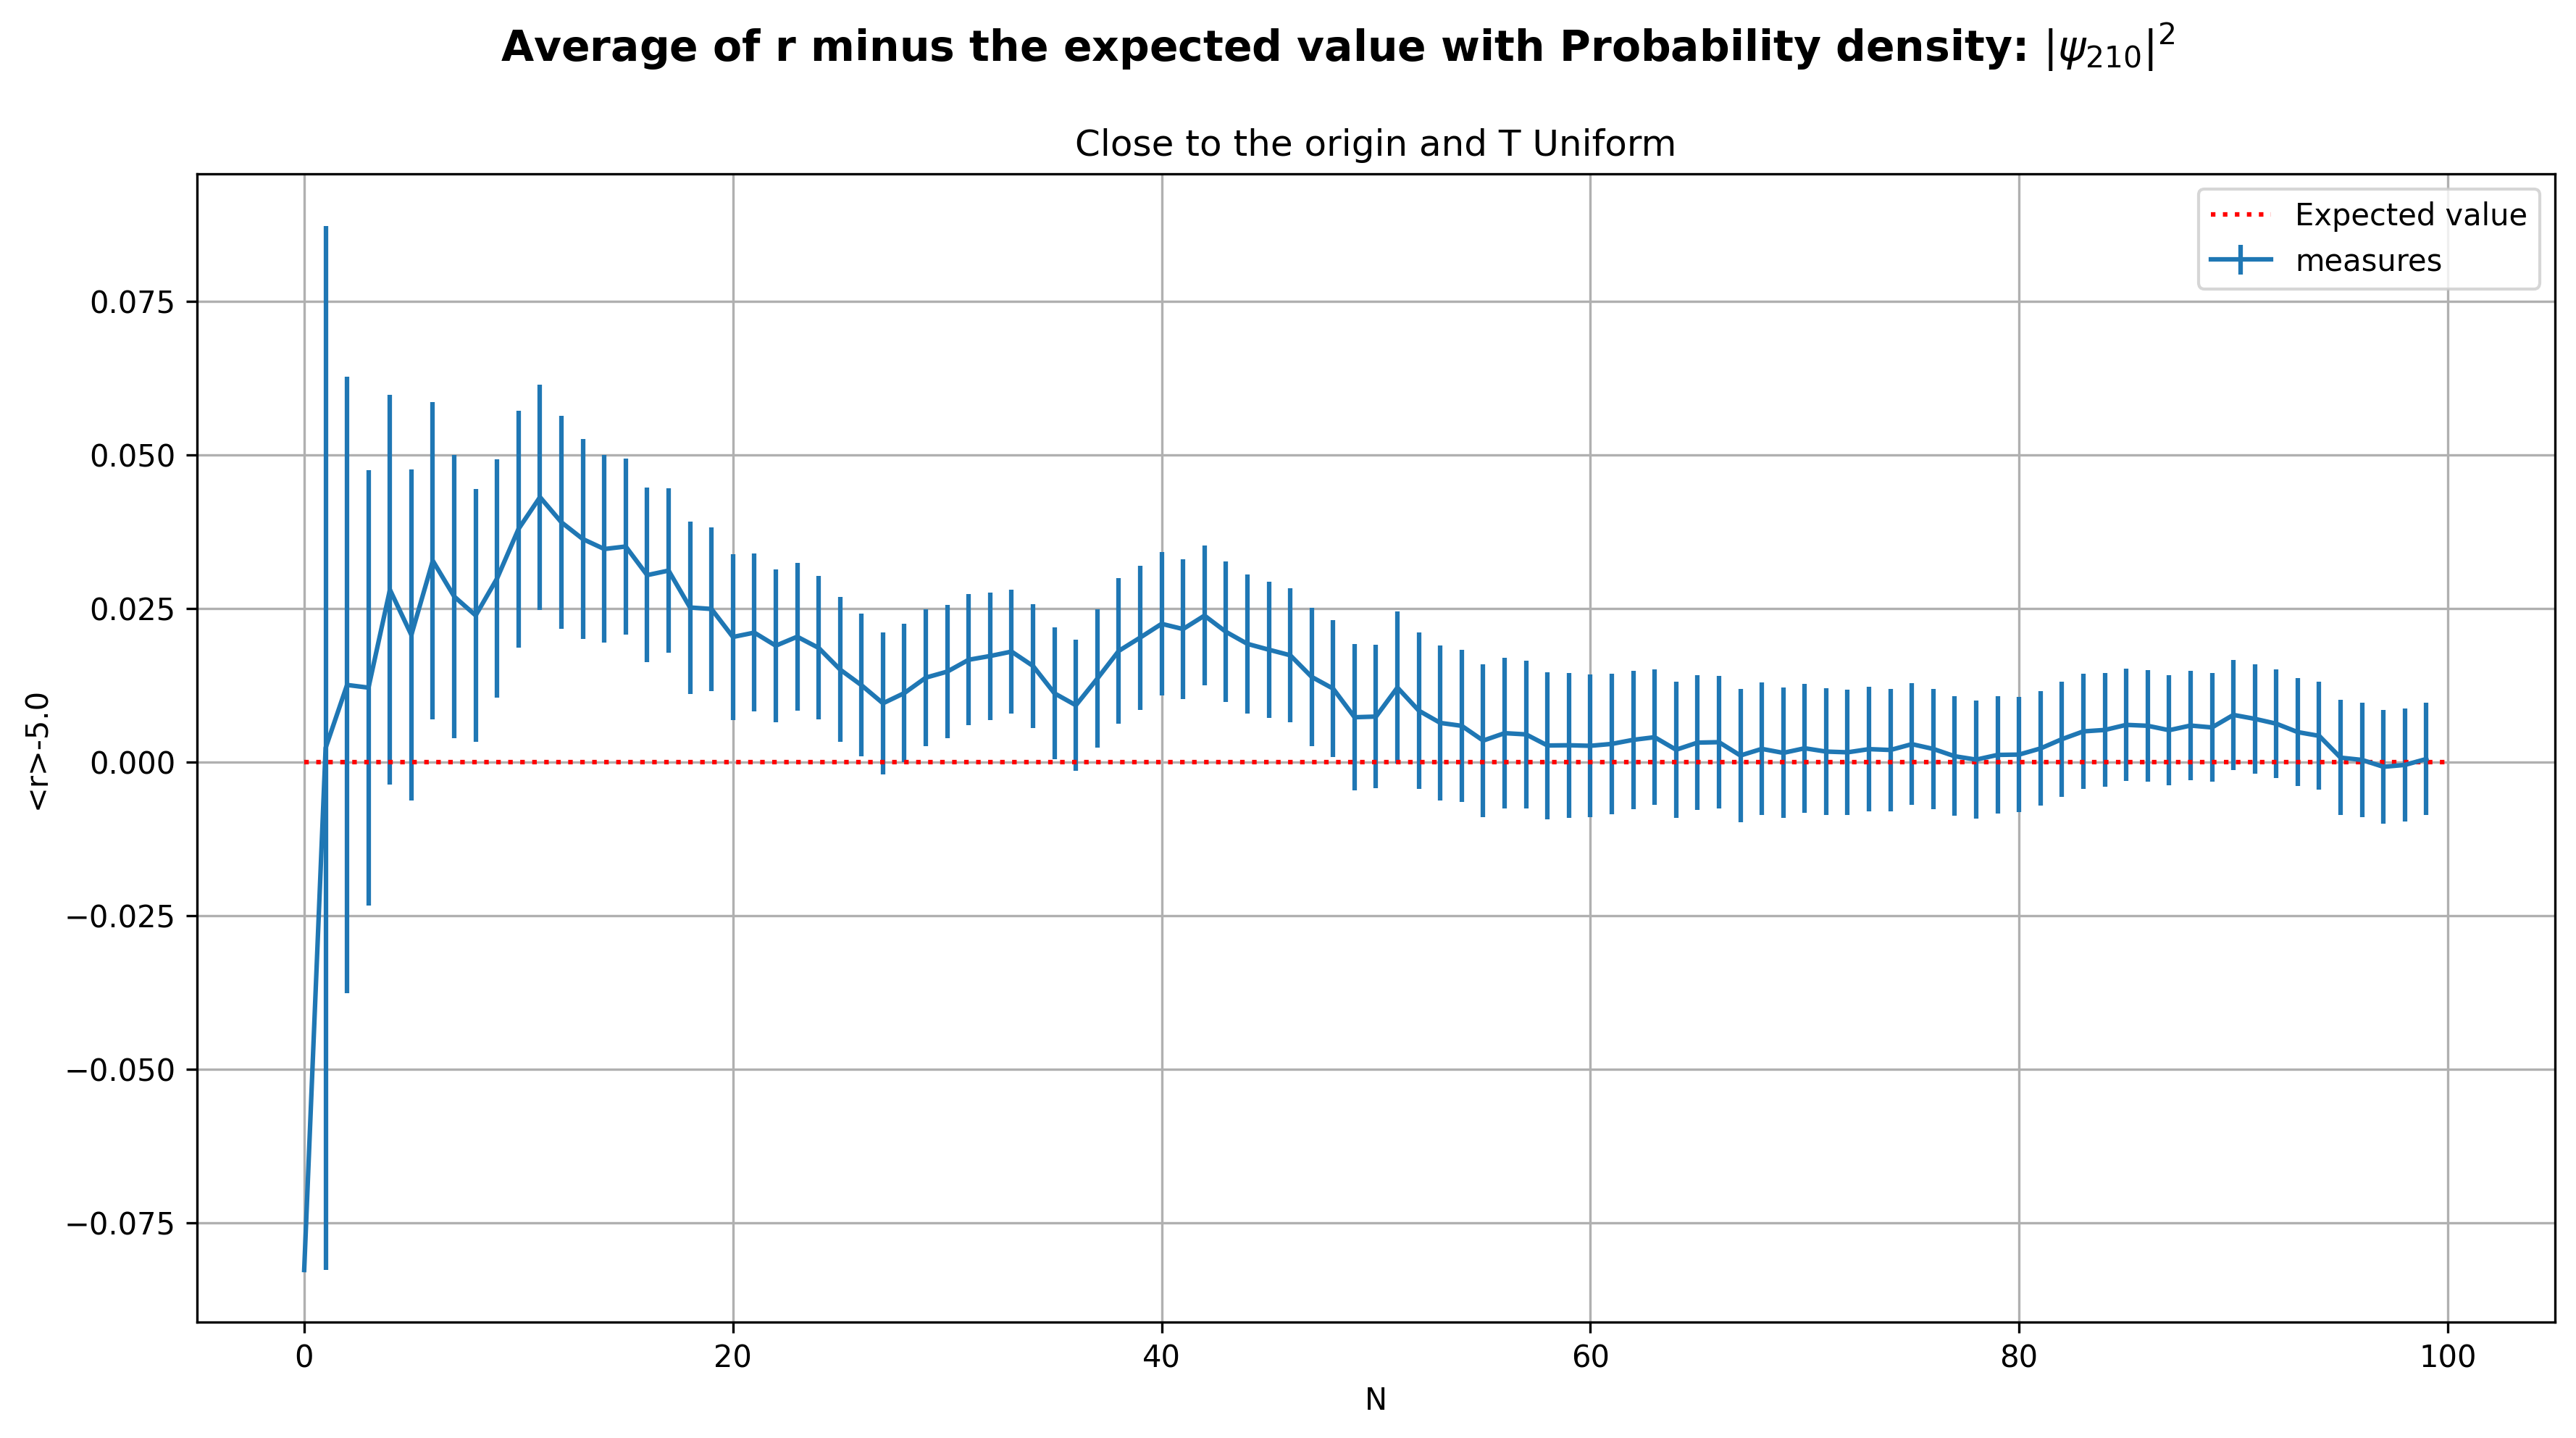

r average for N=100:  5.0005  +-  0.009


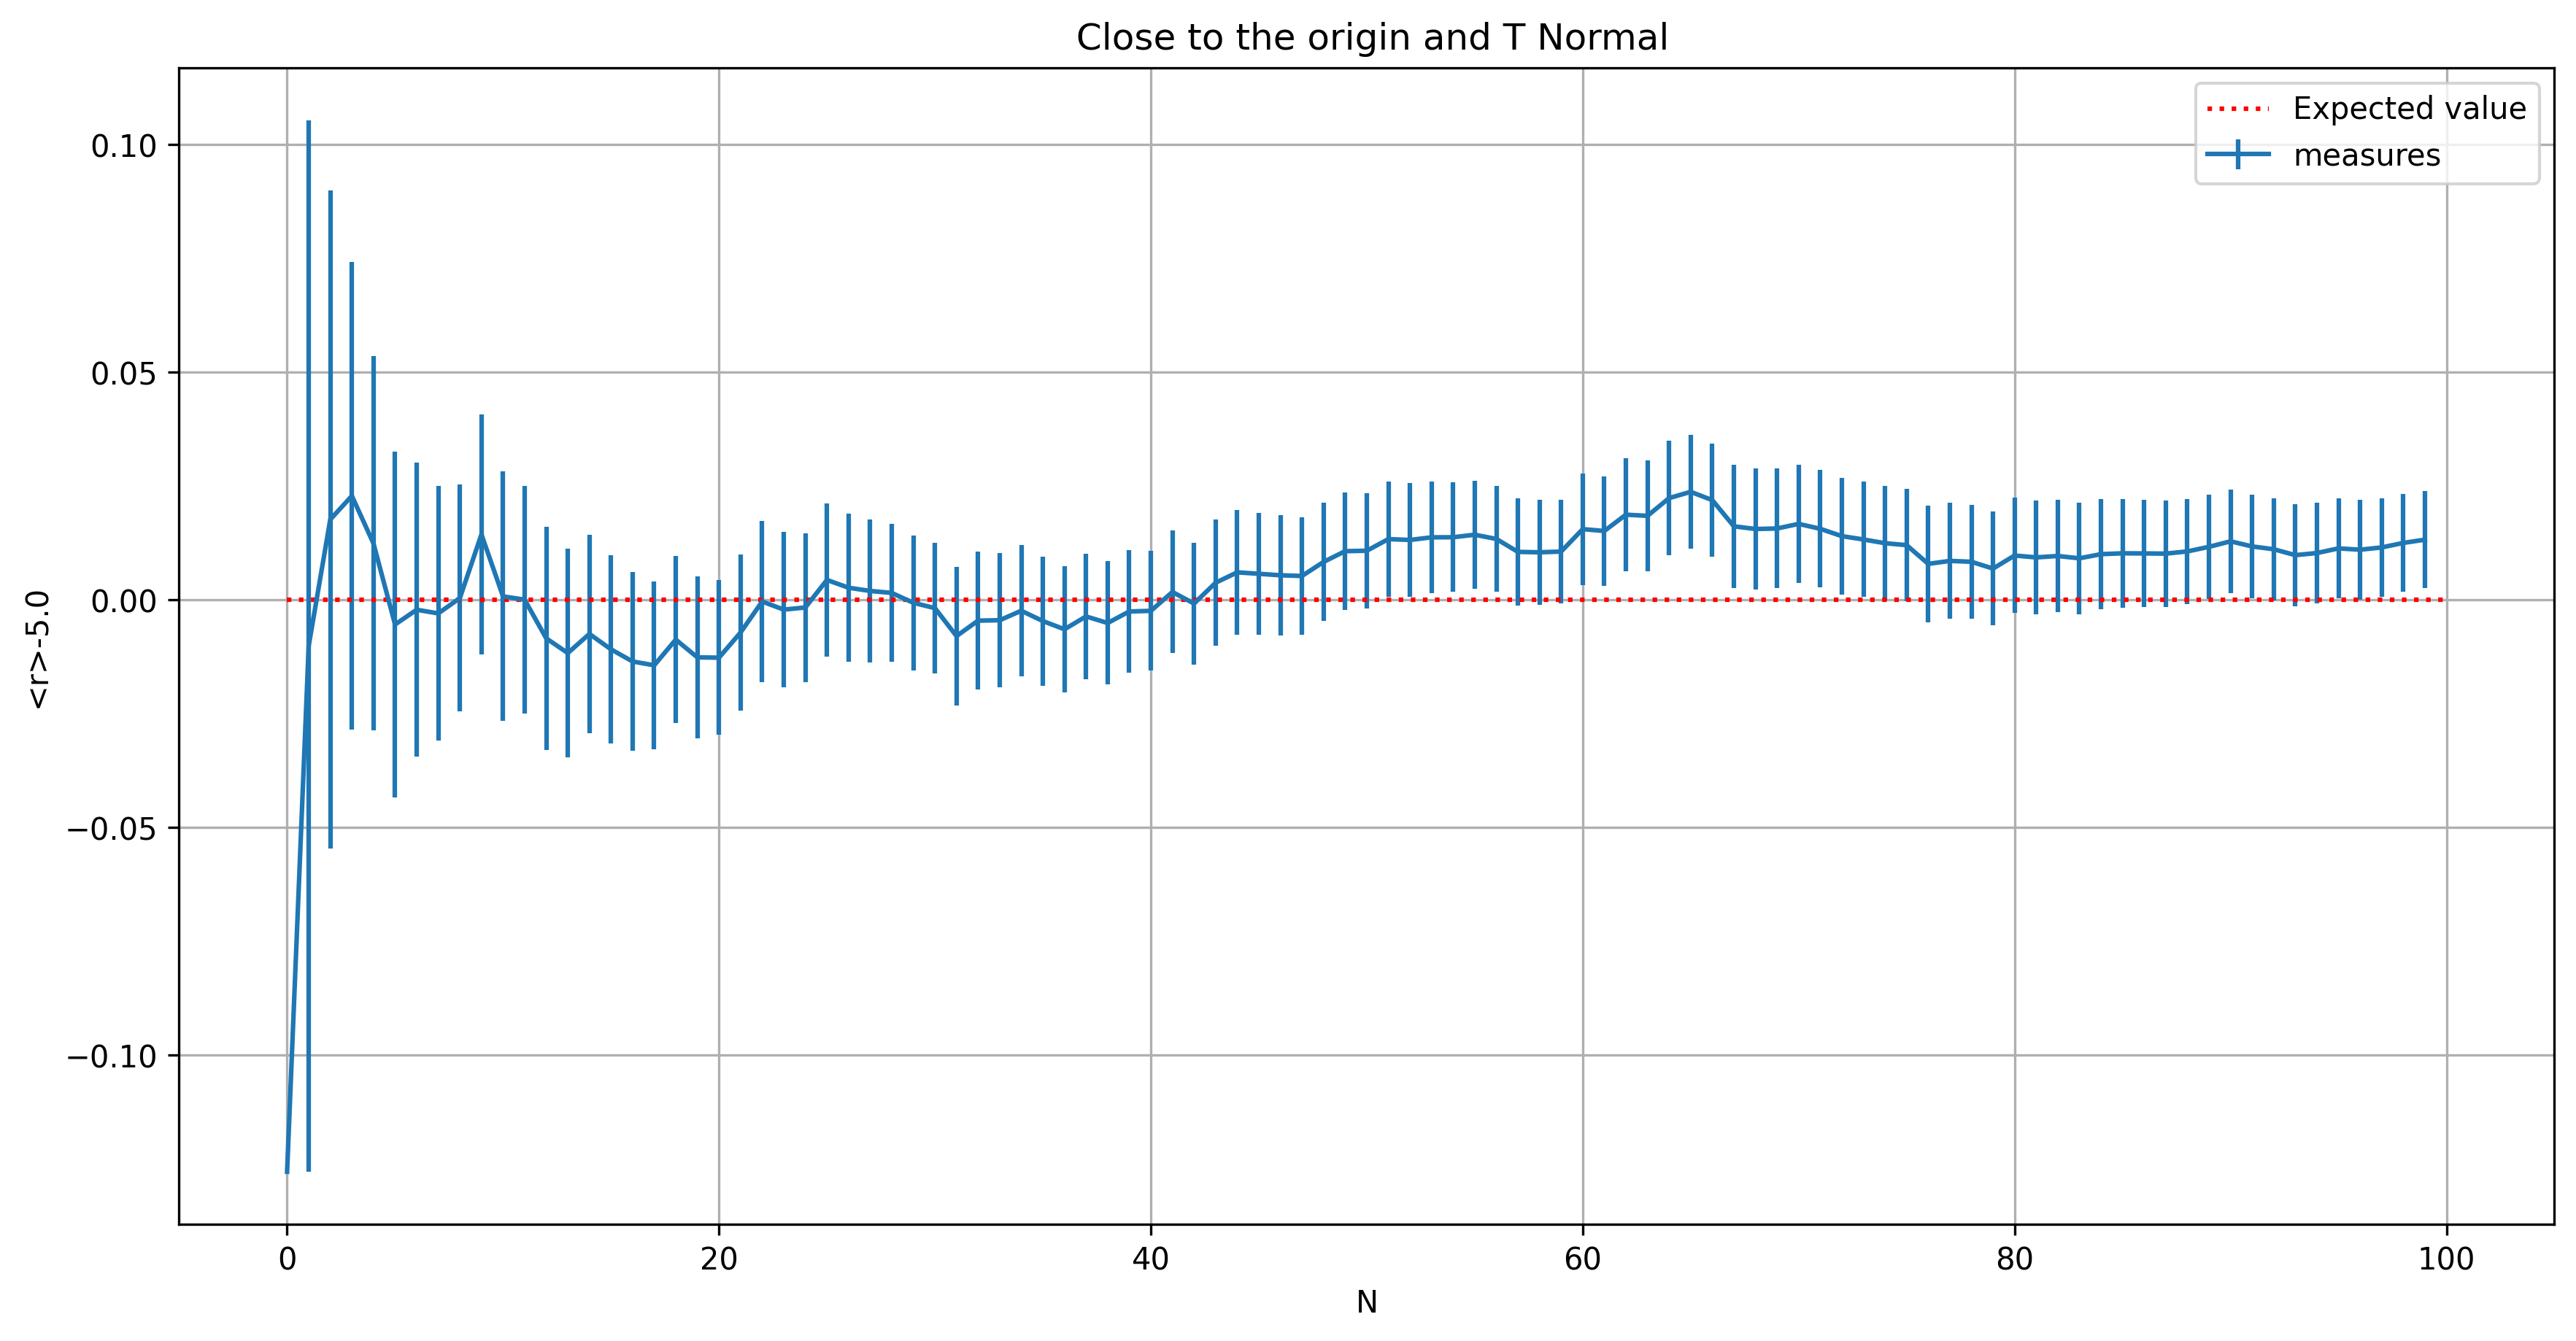

r average for N=100:  5.013  +-  0.01


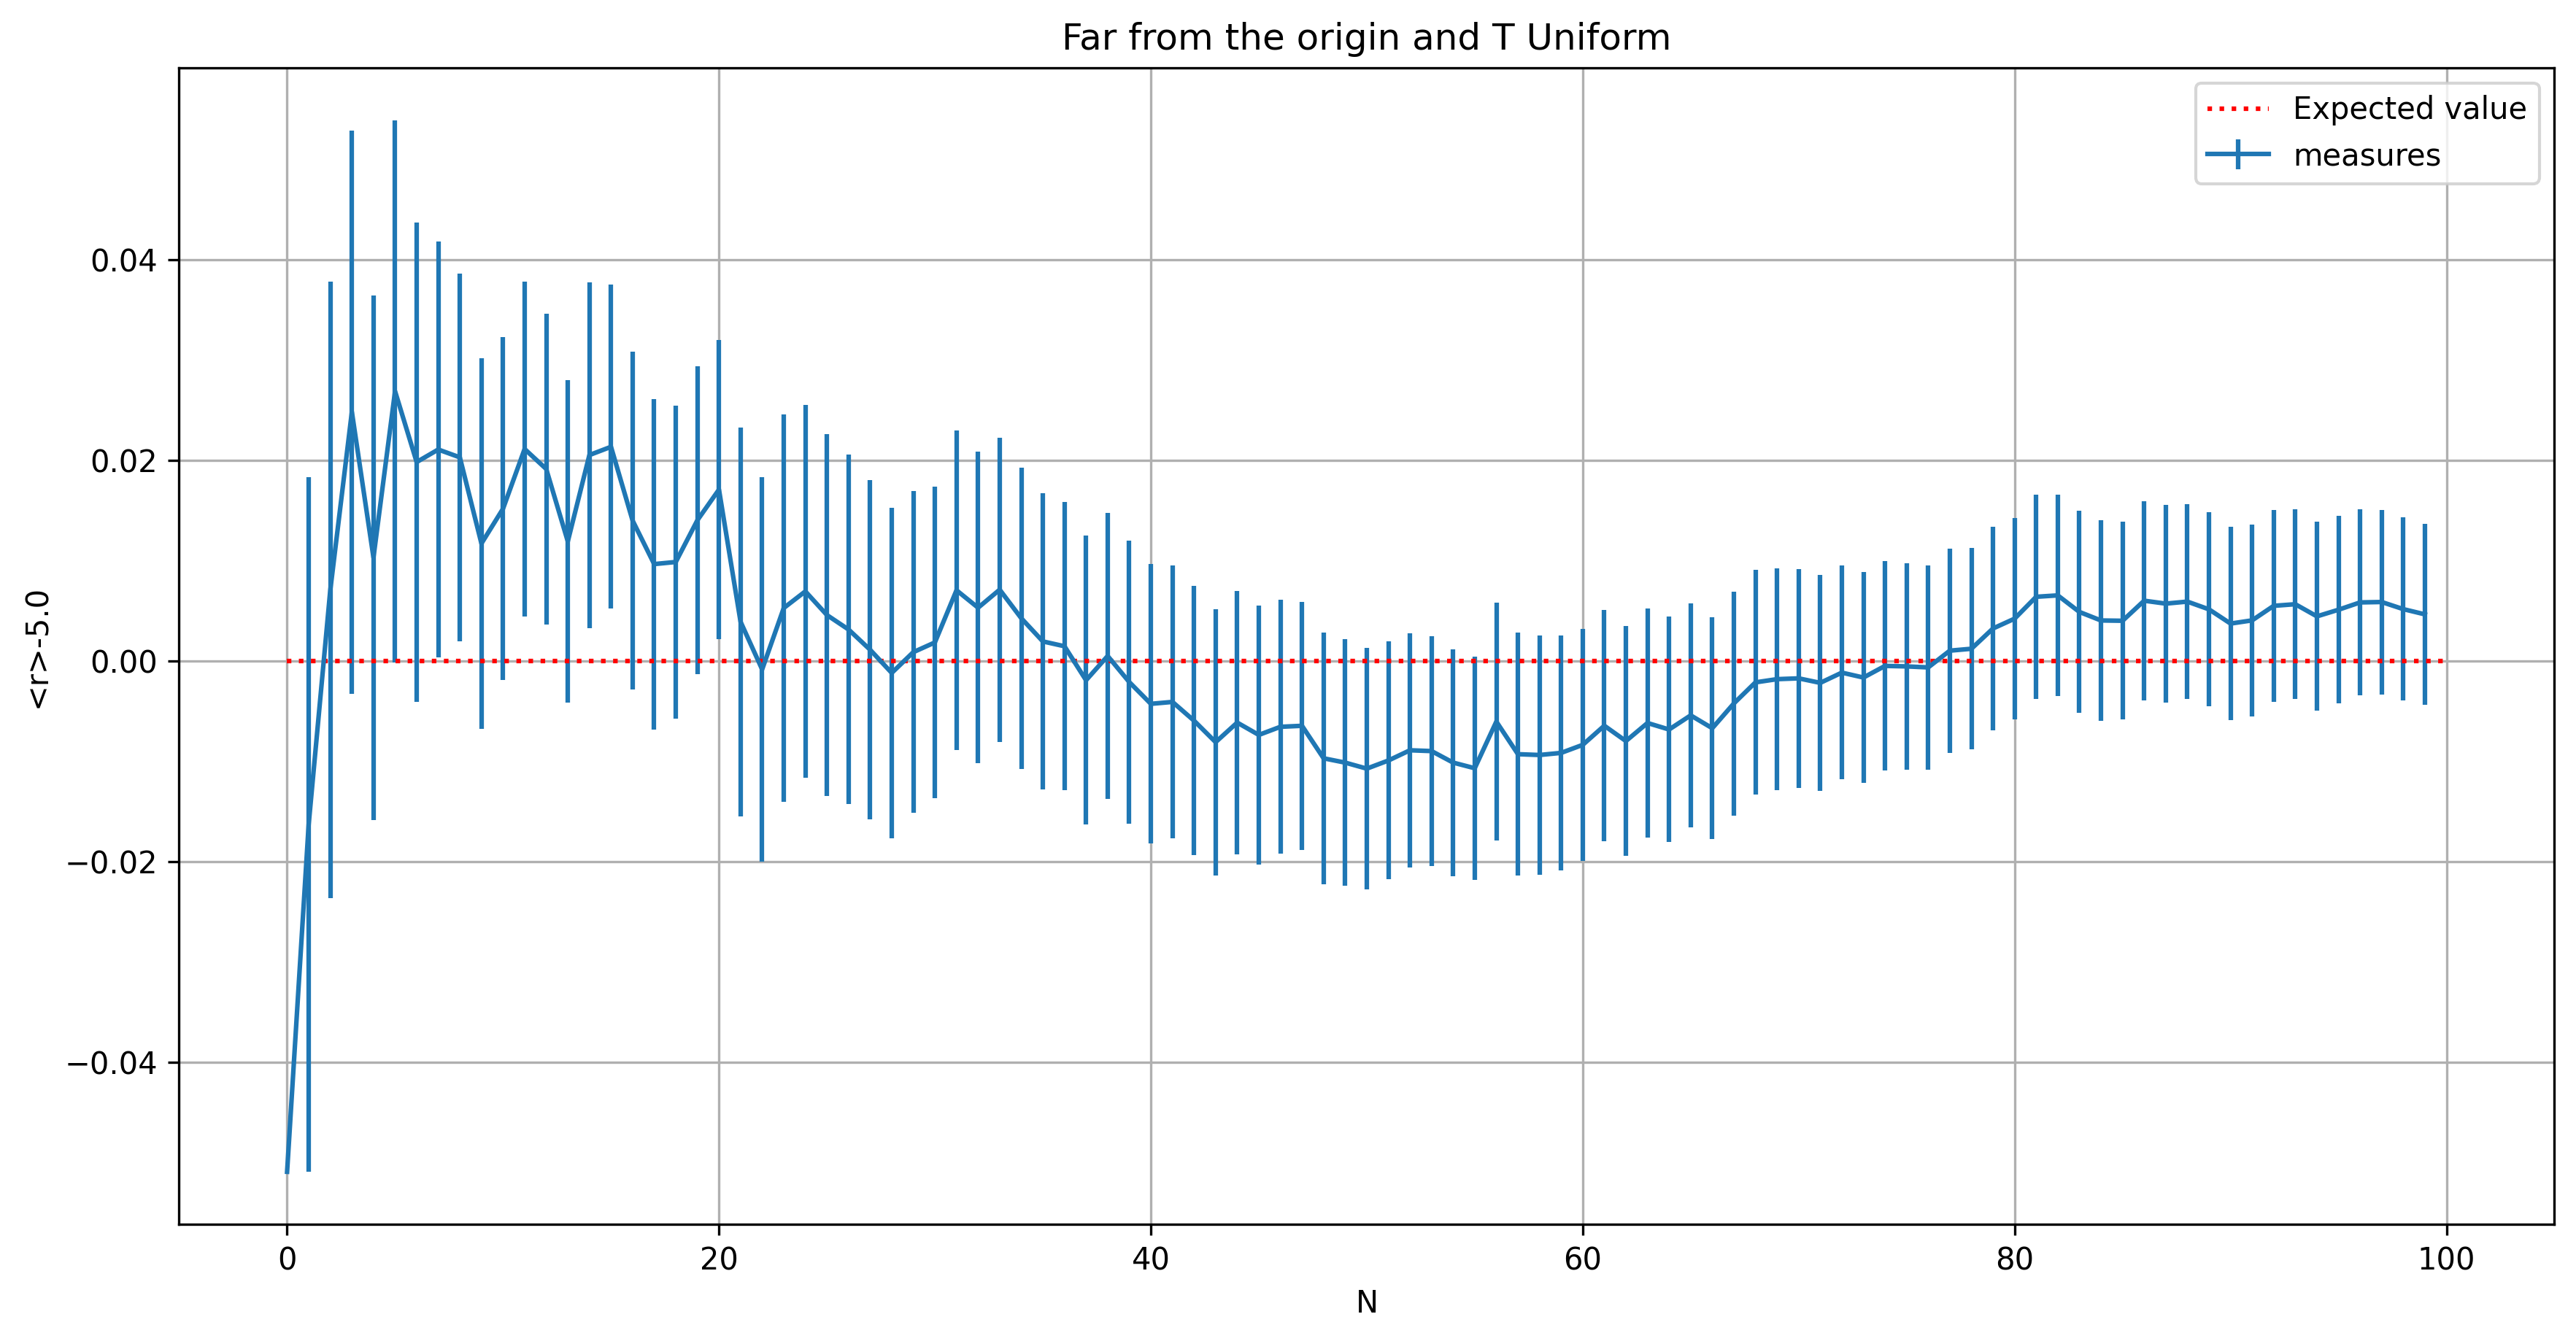

r average for N=100:  5.005  +-  0.009


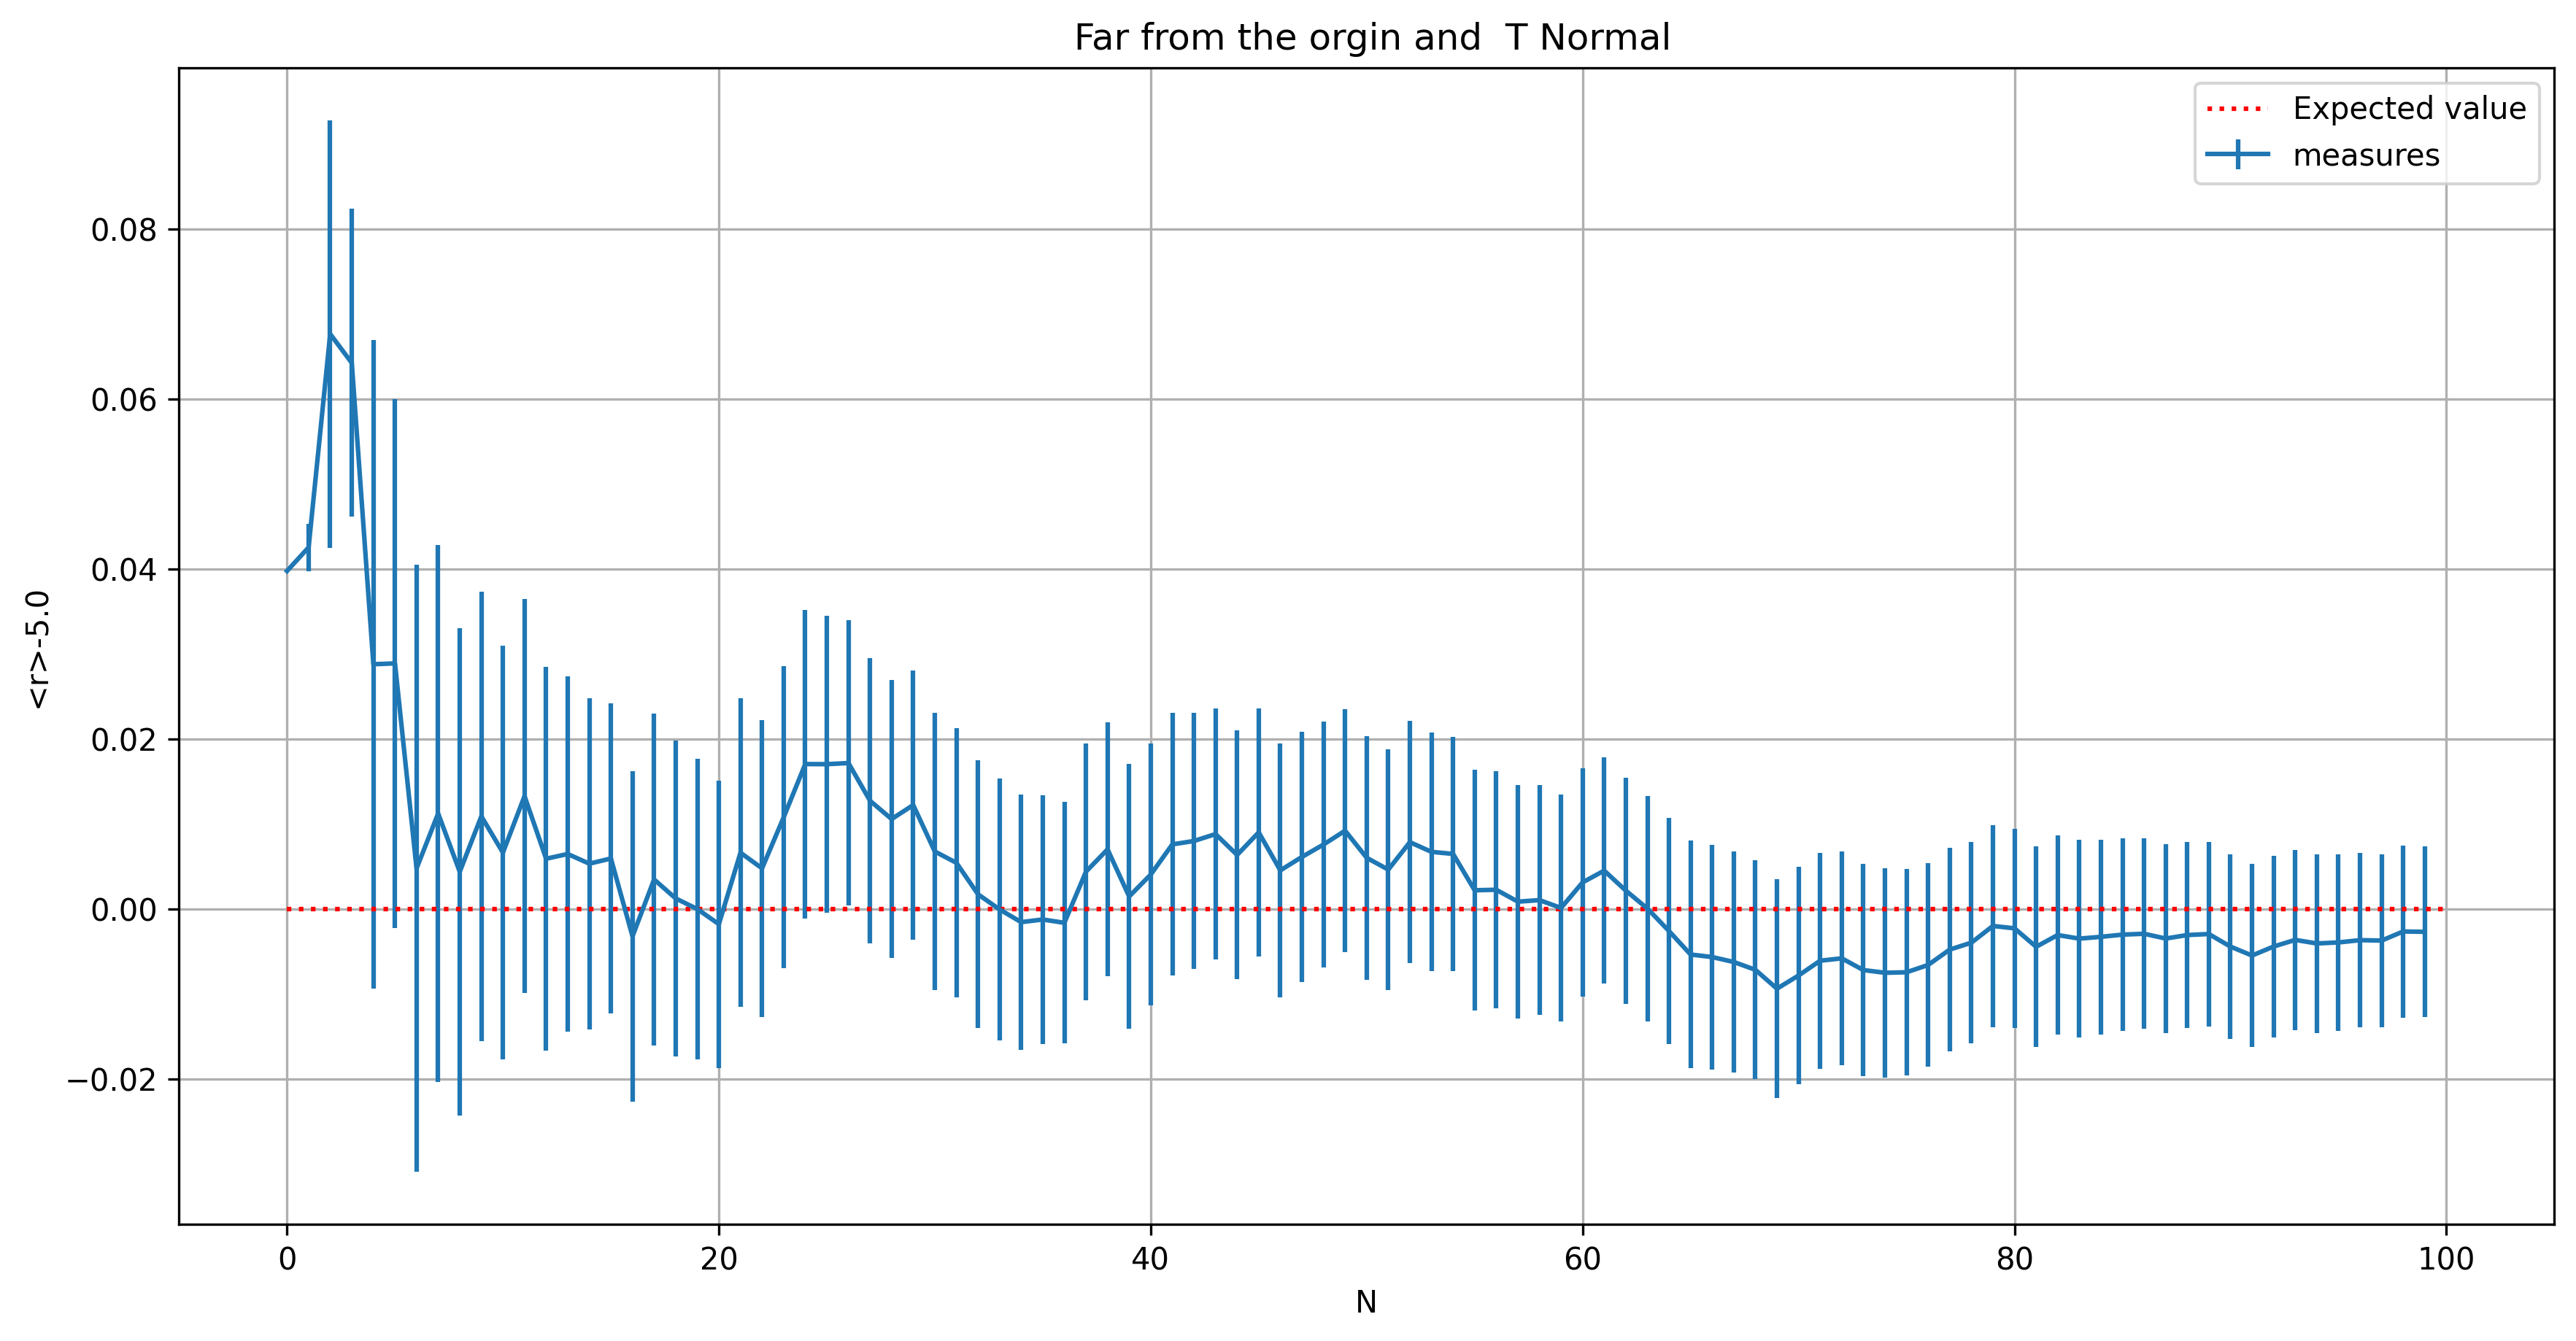

r average for N=100:  4.997  +-  0.01


In [8]:

fig=plt.figure(figsize=(14,7),dpi=300)
fig.suptitle("Average of r minus the expected value with Probability density: $|\psi_{210}|^2$",weight='bold',fontsize='14')

i, x, error = np.loadtxt("5.1/close/Uniform210output.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(i,x-5.0,error,label = "measures")
plt.hlines(
    0,
    0, # Start of horizontal line
    100, # End == total number of trials, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)


plt.legend()
plt.xlabel('N')
plt.ylabel('<r>-5.0')
plt.grid(True)
plt.title("Close to the origin and T Uniform")
plt.show()
print("r average for N=100: ","{:.5}".format(x[99])," +- ", "{:.1}".format(error[99]))



i, x, error = np.loadtxt("5.1/close/Normal210output.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(14,7),dpi=300)

plt.errorbar(i,x-5.0,error,label = "measures")
plt.hlines(
    0,
    0, # Start of horizontal line
    100, # End == total number of trials, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.legend()
plt.xlabel('N')
plt.ylabel('<r>-5.0')
plt.grid(True)
plt.title(" Close to the origin and T Normal")
plt.show()
print("r average for N=100: ","{:.4}".format(x[99])," +- ", "{:.1}".format(error[99]))


fig=plt.figure(figsize=(14,7),dpi=300)
i, x, error = np.loadtxt("5.1/far/Uniform210output.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(i,x-5.0,error,label = "measures")
plt.hlines(
    0,
    0, # Start of horizontal line
    100, # End == total number of trials, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)


plt.legend()
plt.xlabel('N')
plt.ylabel('<r>-5.0')
plt.grid(True)
plt.title("Far from the origin and T Uniform")
plt.show()
print("r average for N=100: ","{:.4}".format(x[99])," +- ", "{:.1}".format(error[99]))



i, x, error = np.loadtxt("5.1/far/Normal210output.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig=plt.figure(figsize=(14,7),dpi=300)

plt.errorbar(i,x-5.0,error,label = "measures")
plt.hlines(
    0,
    0, # Start of horizontal line
    100, # End == total number of trials, i.e. input data points.
    colors = "red",
    linestyle = "dotted",
    label = "Expected value"
)
plt.legend()
plt.xlabel('N')
plt.ylabel('<r>-5.0')
plt.grid(True)
plt.title(" Far from the orgin and  T Normal")
plt.show()
print("r average for N=100: ","{:.4}".format(x[99])," +- ", "{:.1}".format(error[99]))




In all the graphs, the average approaches the expected value and it is within 2 standard deviations from the latter. The two transition probabilities produce equivalent results.